# **CAPSTONE 2 - New York City TLC Trip Record**
**JCDS 0808 - 007 - Yanfa Anandika**

## **1. Domain Knowledge**

Referensi : https://www.nyc.gov/site/tlc/index.page

New York City Taxi & Limousine Commission (NYC TLC) adalah lembaga pemerintah kota yang bertanggung jawab atas perizinan dan regulasi taksi, kendaraan sewa (community-based liveries, black cars and luxury limousines), van komuter, dan kendaraan paratransit di kota New York, Amerika Serikat.

TLC melisensikan lebih dari 130.000 kendaraan di New York City. Setiap kendaraan menjalani inspeksi keselamatan dan emisi komprehensif oleh TLC dan harus dikendarai oleh pengemudi berlisensi TLC yang telah menjalani pemeriksaan latar belakang dan lulus persyaratan pendidikan TLC.

Jenis-jenis kendaraan berlisensi TLC :

*Yellow Taxi (Taksi Kuning)*
- Taksi yang bisa street-hail diseluruh wilayah New York

*Green Taxi (Taksi Hijau)*
- Taksi yang didesain untuk street-hail di wilayah luar Manhattan
- Tidak boleh street-hail di Manhattan pusat (di bawah 96th Street di East Side, di bawah 110th Street di West Side)
- Tetapi boleh drop off dimana saja, termasuk Manhattan

*Standard For-Hire Vehicles (Kendaraan sewa biasa)*
- Community Livery, UberX, Lyft, Juno, dan Via
- Pemesanan hanya melalui pangkalan atau aplikasi, dengan tarif yang sudah ditentukan
- Tidak menggunakan argo

*High Volume For-Hire Vehivles (Kendaraan sewa premium)*
- Uber Black, Lyft Lux, Black Car, Luxury Limousines
- Pemesanan hanya melalui pangkalan atau aplikasi, dengan tarif yang sudah ditentukan
- Tidak menggunakan argo

*Commuter Van*
- Rute tetap, mirip shuttle bus
- Tarif ditetapkan oleh Commuter Van Authority, tidak menggunakan argo
- Biasanya ada titik penjemputannya, tidak bisa hail

*Paratransit Vehicle*
- Transportasi terjadwal untuk pasien atau penyandang disabilitas yang membutuhkan bantuan aksesibilitas, tapi tidak dalam kondisi darurat
- Dipesan jauh hari atau terjadwal, bukan layanan 24 jam
- Diatur oleh TLC sebagai kendaraan angkutan penumpang khusus berbeda dengan Ambulance

-----------------------------------------------
-----------------------------------------------

## **2. Rumusan Masalah**

Dari dataset NYC TLC Trip Record yang akan digunakan, ditemukan bahwa dataset tersebut adalah **Green Trip Data (Taksi Hijau)**.

Taksi Hijau, juga dikenal sebagai Boro Taxi, diperkenalkan oleh NYC TLC pada tahun 2013. Tujuannya melayani area yang kurang terjangkau oleh taksi kuning, khususnya di luar Manhattan pusat (Manhattan Utara, diatas East 96th Street dan West 110th Street dan outer boroughs : Bronx, Brooklyn, Queens, Staten Island) 

Taksi Hijau biasanya dimiliki dan dioperasikan oleh individu atau **Fleet Owner** yaitu perusahaan taksi, atau kelompok pengusaha lokal. Semua pengemudi harus memiliki lisensi pengemudi TLC yang valid dan lulus pemeriksaan.

### **2.1 Stake Holder : Fleet Owner Green Taxi**

Tantangan yang dihadapi oleh Fleet Owner Green Taxi adalah persaingan antara Yellow Taxi dan FHV (Uber, Lyft). Seiring dengan perkembangan teknologi, tantangan lain yang dihadapi yaitu pemesanan secara online/aplikasi, Green Taxi sudah tersedia dalam aplikasi NYC TLC Official App maupun aplikasi pihak ketiga lain. Namun perlu peningkatan kinerja lain untuk mempertahankan serta meningkatkan kepercayaan pelanggan agar tetap memilih Green Taxi :

- Meningkatkan kesiapan armada
- Meningkatkan kepuasan pelanggan

### **2.2 Analysis Goals**

Dari permasalahan yang ada, diharapkan masalah dapat diselesaikan dengan cara :

- Mencari lokasi yang ramai permintaan berdasarkan wilayah dan zona
- Mencari waktu yang ramai permintaan berdasarkan tanggal, hari, dan jam
- Mengidentifikasi preferensi/perilaku pelanggan berdasarkan metode pembayaran, tip yang diberikan, penggunaan taksi oleh pelanggan

-----------------------------------------------
-----------------------------------------------

## **3. Data**

Untuk menjawab pertanyaan diatas, kita akan menganalisa data dari dataset Dari dataset NYC TLC Trip Record.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

----------------------------------------------------------------------

### **3.1 Additional Data**

Untuk memudahkan analisis diperlukan nama wilayah berdasarkan Location ID, yang didapat dari situs resmi NYC TLC : 

https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

*Taxi Zone Lookup Table (CSV)*


In [6]:
path = 'C:\\Users\\Yanfa\\Downloads\\Documents\\Purwadhika\\CAPSTONE\\CAPSTONE2\\Dataset\\'

df_location = pd.read_csv(path + 'taxi_zone_lookup.csv')
df_location

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [7]:
df_location.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

***Mengisi missing value kolom*** `Borough`, `Zone`, `service_zone`

- diasumsikan 2 ID dengan missing value tersebut adalah daerah luar NYC
- maka akan diisi dengan 'Unknown' dan 'Outside of NYC'

In [8]:
df_location['Borough'].replace('Unknown','Outside of NYC', inplace=True)

In [9]:
df_location.fillna({'Borough': 'Outside of NYC', 
                    'Zone': 'Outside of NYC', 
                    'service_zone': 'Unknown'}, inplace=True)

In [10]:
df_location

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Outside of NYC,Outside of NYC,Unknown


----------------------------------------------------------------------

### **3.2 Combining Data**

Supaya Pickup dan Dropoff Location lebih jelas, saya gabungkan dataset NYC TLC Trip Record dan Taxi Zone Lookup

In [11]:
# Menyamakan nama kolom Pickup
df_location.rename(columns={'LocationID':'PULocationID'}, inplace=True)

# Merge Pickup Location
df = pd.merge(left=df, right=df_location, on='PULocationID', how='left')

# Drop Service Zone karena tidak digunakan
df.drop(columns='service_zone', inplace=True)

# Rename untuk Pickup
df.rename(columns={'Borough':'pu_borough','Zone':'pu_zone','service_zone':'pu_service_zone'}, inplace=True)

In [12]:
# Menyamakan nama kolom Dropoff
df_location.rename(columns={'PULocationID':'DOLocationID'}, inplace=True)

# Merge Dropoff Location
df = pd.merge(left=df, right=df_location, on='DOLocationID', how='left')

# Drop Service Zone karena tidak digunakan
df.drop(columns='service_zone', inplace=True)

# Rename untuk dropoff
df.rename(columns={'Borough':'do_borough','Zone':'do_zone','service_zone':'do_service_zone'}, inplace=True)

In [13]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Brooklyn,Crown Heights South
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN,Queens,Baisley Park,Queens,Saint Albans
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights


----------------------------------------------------------------------

### **3.3 Data Understanding**

Mari pahami isi dari dataset NYC TLC Trip Record


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

***Penjelasan setiap kolom :***

`VendorID` : provider pencatatan perjalanan
- 1 = CreativeMobileTechnologies,LLC.
- 2 = VeriFoneInc.

`lpep_pickup_datetime` : waktu penjemputan penumpang

`lpep_dropoff_datetime` : waktu penurunan penumpang

`store_and_fwd_flag` : catatan perjalanan disimpan diperangkat sebelum dikirim ke server, karena kehilangan koneksi
- `Y` data disimpan diperangkat sebelum dikirim ke server
- `N` data langsung data dikirim

`RatecodeID` : jenis tarif
- 1 = Standard rate
- 2 = JFK Airport
- 3 = Newark
- 4 = Nassau or Westchester
- 5 = Negotiated fare
- 6 = Group ride

`PULocationID`: id lokasi penjemputan penumpang berdasarkan zona geografis NYC TLC

`DOLocationID` : id lokasi penurunan penumpang berdasarkan zona geografis NYC TLC

`passenger_count` : jumlah penumpang dalam perjalanan

`trip_distance` : jarak tempuh perjalanan

`fare_amount` : tarif dasar berdasarkan waktu dan jarak

`extra` : biaya tambahan (malam, atau jam sibuk)
- $1 (jam sibuk 4pm - 8pm)
- $1 (jam malam 8pm - 6am)

`mta_tax` : pajak MTA (Metropolitan Transportation Authority) $0.50 

`tip_amount` : jumlah tip yang diberikan penumpang dengan pembayaran credit card

`tolls_amount` : biaya tol selama perjalanan

`ehail_fee` : biaya layanan pemesanan online/aplikasi

`improvement_surcharge` : biaya tambahan untuk pengembangan layanan $0.30

`total_amount` : total jumlah yang dibayar termasuk pajak dan biaya tambahan

`payment_type` : metode pembayaran
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

`trip_type` : jenis perjalanan
- 1 = Street-hail
- 2 = Dispatch

`congestion_surcharge` : biaya tambahan untuk kemacetan $2.75 Green Taxi

`pu_borough` : nama wilayah penjemputan

`pu_zone` : nama zona penjemputan

`do_borough` : nama wilayah drop off

`do_zone` : nama zona drop off

In [15]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,pu_borough,pu_zone,do_borough,do_zone
count,68211,68211,63887,68211,68211,68211,68211
unique,66575,66519,2,7,224,7,247
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N,Manhattan,East Harlem North,Manhattan,East Harlem South
freq,4,6,63579,39436,13257,39617,3524


In [16]:
list_item = []

for col in df.columns:
    list_item.append([col, df[col].nunique(), df[col].unique()])

tabel_unique = pd.DataFrame(columns=['column', 'unique_total', 'unique_sample'], data=list_item)
tabel_unique

,column,unique_total,unique_sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,2,"[N, Y, nan]"
4,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


****Melakukan uji normalitas data pada kolom numerik dengan data kontinu :****

In [17]:
from scipy.stats import shapiro

list_kolom_numeric = ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']
list_pv = []
list_hasil_uji = []

df_sample = df.sample(min(len(df), 2000), random_state=42)

for i in list_kolom_numeric:
    stats, pvalue = shapiro(df_sample[i].dropna())

    if pvalue >= 0.05:
        hasil = 'Terdistribusi normal' # Gagal menolak H0
    else:
        hasil = 'Tidak terdistribusi normal' # Menolak H0
    
    list_pv.append(pvalue)
    list_hasil_uji.append(hasil)

In [18]:
uji_normalitas = pd.DataFrame({
    'kolom':list_kolom_numeric,
    'pvalue':list_pv,
    'hasil':list_hasil_uji
})
uji_normalitas

,kolom,pvalue,hasil
0,passenger_count,7.402673e-62,Tidak terdistribusi normal
1,trip_distance,1.215916e-72,Tidak terdistribusi normal
2,fare_amount,4.335857e-58,Tidak terdistribusi normal
3,extra,3.504858e-52,Tidak terdistribusi normal
4,mta_tax,2.809343e-55,Tidak terdistribusi normal
5,tip_amount,2.226392e-43,Tidak terdistribusi normal
6,tolls_amount,6.571658e-70,Tidak terdistribusi normal
7,improvement_surcharge,2.927246e-67,Tidak terdistribusi normal
8,total_amount,1.913345e-54,Tidak terdistribusi normal
9,congestion_surcharge,3.388059e-55,Tidak terdistribusi normal


----------------------------------------------------------------------

### **3.4 Data Cleaning**

Sebelum melakukan analisis lebih lanjut, perlu penanganan terhadap Missing Value dalam dataset NYC TLC Trip Record untuk mendapatkan hasil yang lebih akurat

***Data sebelum dilakukan pembersihan :***

In [19]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
pu_borough                   0
pu_zone                      0
do_borough                   0
do_zone                      0
dtype: int64

In [20]:
list_nama_kolom = []
for col in df.columns:
    list_nama_kolom.append(col)

<Axes: >

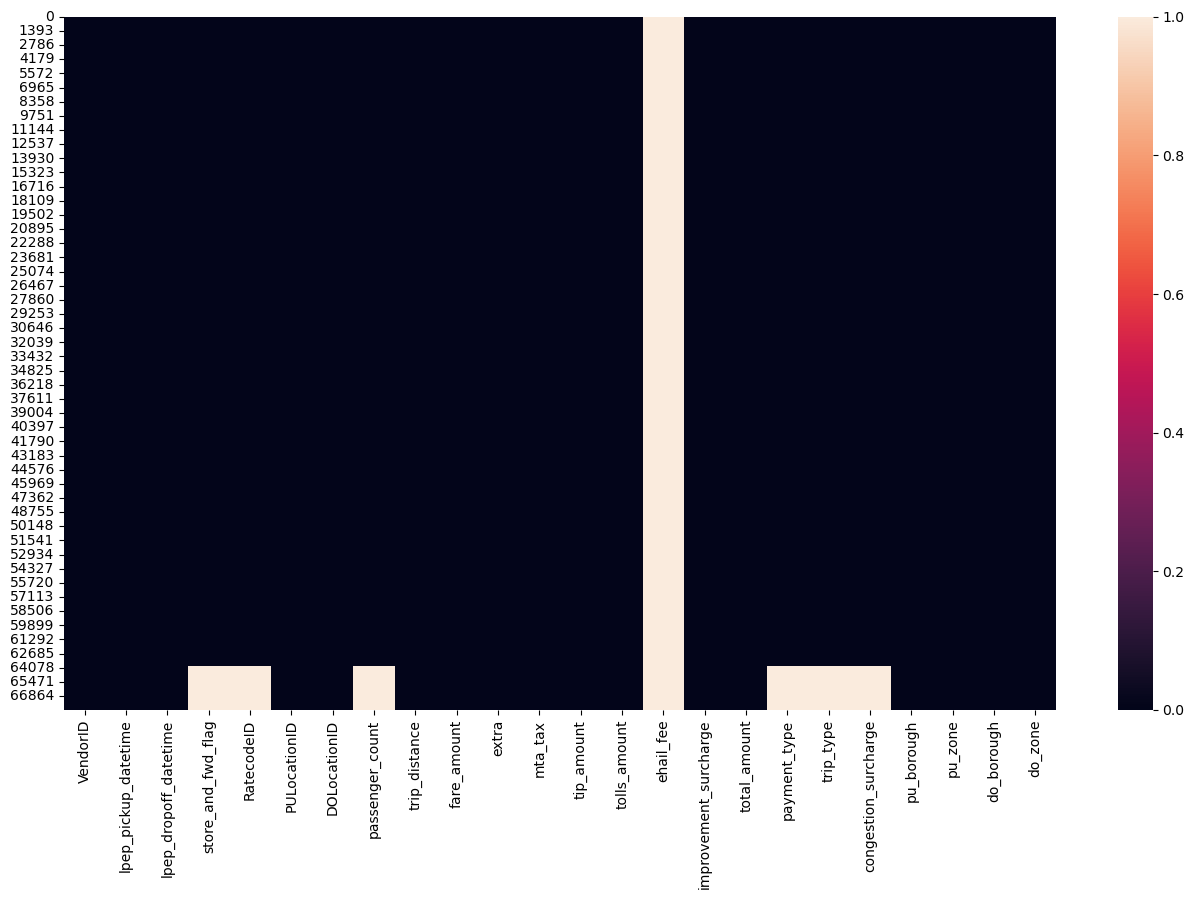

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df[list_nama_kolom].isna())

In [22]:
(df.isna().sum() / len(df) * 100).round(2).astype(str) + '%'

VendorID                   0.0%
lpep_pickup_datetime       0.0%
lpep_dropoff_datetime      0.0%
store_and_fwd_flag        6.34%
RatecodeID                6.34%
PULocationID               0.0%
DOLocationID               0.0%
passenger_count           6.34%
trip_distance              0.0%
fare_amount                0.0%
extra                      0.0%
mta_tax                    0.0%
tip_amount                 0.0%
tolls_amount               0.0%
ehail_fee                100.0%
improvement_surcharge      0.0%
total_amount               0.0%
payment_type              6.34%
trip_type                 6.35%
congestion_surcharge      6.34%
pu_borough                 0.0%
pu_zone                    0.0%
do_borough                 0.0%
do_zone                    0.0%
dtype: object

Drop kolom yang tidak diperlukan
- Karena kolom `ehail_fee` kosong **100%** dan tidak bisa digunakan maka dihapus
- Kolom `VendorID` berisi nama penyedia alat pembacaan data, tidak digunakan dalam analisis
- Kolom `store_and_fwd_flag` berisi jenis data yang langsung diforward ke server atau disimpan dulu, tidak digunakan dalam analisis

In [23]:
df.drop(columns=['ehail_fee','VendorID','store_and_fwd_flag'], inplace=True)

In [24]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
pu_borough                  0
pu_zone                     0
do_borough                  0
do_zone                     0
dtype: int64

#### **3.4.1 Cleaning** `RatecodeID`
***Menangani anomali pada*** `RatecodeID`

In [25]:
df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0     62103
NaN      4324
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [26]:
df.query('RatecodeID == 99')

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
1084,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Brooklyn,Coney Island
2174,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0,Queens,East Flushing,Queens,Elmhurst
9055,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0,Brooklyn,Bay Ridge,Brooklyn,Homecrest
14125,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0,Brooklyn,Crown Heights North,Brooklyn,East New York/Pennsylvania Avenue
29143,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0,Brooklyn,Gravesend,Brooklyn,Park Slope
29711,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Brooklyn,Homecrest
35975,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Manhattan,Flatiron,Manhattan,East Chelsea
37691,2023-01-19 17:16:59,2023-01-19 22:29:53,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0,Outside of NYC,Outside of NYC,Brooklyn,Homecrest
42432,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0,Brooklyn,Manhattan Beach,Brooklyn,Homecrest
45204,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0,Manhattan,Washington Heights South,Bronx,West Farms/Bronx River


- `RatecodeID` = 99 akan diisi dengan 1
- Jika dilihat berdasarkan pu_borough dan do_borough masih tergolong ke `RatecodeID` = 1

In [27]:
df['RatecodeID'].replace({99:1}, inplace= True)

In [28]:
df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0    62113
NaN     4324
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

***Mengisi missing value kolom*** `RatecodeID`

In [29]:
df['RatecodeID'].skew()

np.float64(6.043694947593711)

<Axes: xlabel='RatecodeID', ylabel='Count'>

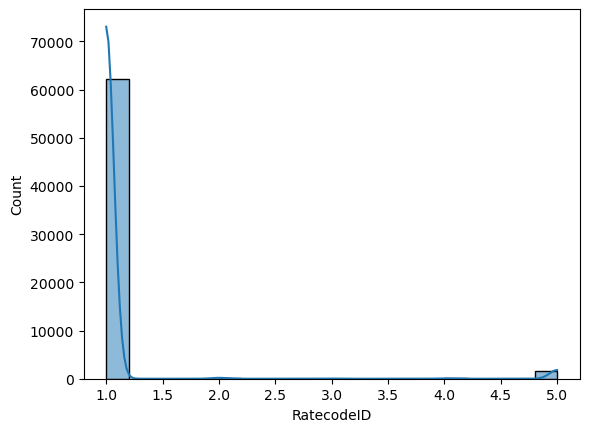

In [30]:
sns.histplot(df, x='RatecodeID', kde=True, bins=20)

- Kolom `RatecodeID` tidak terdistribusi dengan normal
- Maka saya isi dengan median

In [31]:
df['RatecodeID'].fillna(df['RatecodeID'].median(), inplace=True)

In [32]:
df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0    66437
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

In [33]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
pu_borough                  0
pu_zone                     0
do_borough                  0
do_zone                     0
dtype: int64

#### **3.4.2 Cleaning** `passenger_count`
***Menangani anomali pada*** `passenger_count`

In [34]:
df['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    54299
2.0     5096
NaN     4324
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

- `passenger_count` = 0 akan diisi dengan 1
- diasumsikan karena minimal penumpang 1

In [35]:
df['passenger_count'].replace({0:1}, inplace= True)

In [36]:
df['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    54635
2.0     5096
NaN     4324
5.0     1772
6.0     1054
3.0      958
4.0      364
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

***Mengisi missing value kolom*** `passenger_count`

In [37]:
df['passenger_count'].skew()

np.float64(3.5460384228837443)

<Axes: xlabel='passenger_count', ylabel='Count'>

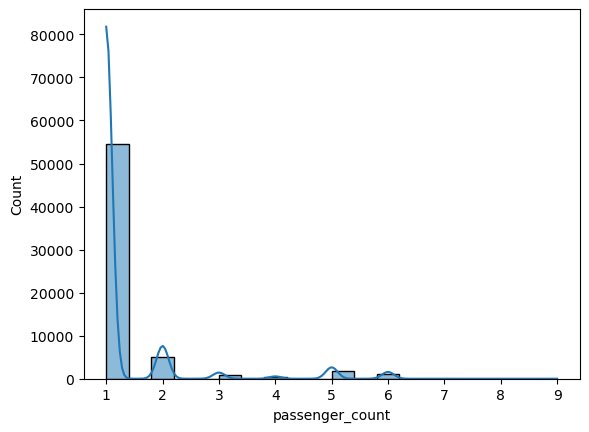

In [38]:
sns.histplot(df, x='passenger_count', kde=True, bins=20)

- Kolom `passenger_count` tidak terdistribusi dengan normal
- Maka saya isi dengan median

In [39]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

In [40]:
df['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    58959
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

In [41]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
pu_borough                  0
pu_zone                     0
do_borough                  0
do_zone                     0
dtype: int64

#### **3.4.3 Cleaning** `payment_type`

In [42]:
df['payment_type'].value_counts(dropna=False)

payment_type
1.0    40686
2.0    22632
NaN     4324
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

Nilai kolom `payment_type`

    1 = Credit card
    2 = Cash
    3 = No charge
    4 = Dispute
    5 = Unknown
    6 = Voided trip

- Missing value pada kolom `payment_type` akan diisi dengan 5
- Sesuai dengan artinya 5 = Unknown

In [43]:
df['payment_type'].fillna(5, inplace=True)

In [44]:
df['payment_type'].value_counts(dropna=False)

payment_type
1.0    40686
2.0    22632
5.0     4326
3.0      472
4.0       95
Name: count, dtype: int64

In [45]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                4334
congestion_surcharge     4324
pu_borough                  0
pu_zone                     0
do_borough                  0
do_zone                     0
dtype: int64

#### **3.4.4 Cleaning** `trip_type`

In [46]:
df['trip_type'].value_counts(dropna=False)

trip_type
1.0    62476
NaN     4334
2.0     1401
Name: count, dtype: int64

In [47]:
df['trip_type'].skew()

np.float64(6.5282683544035525)

<Axes: xlabel='trip_type', ylabel='Count'>

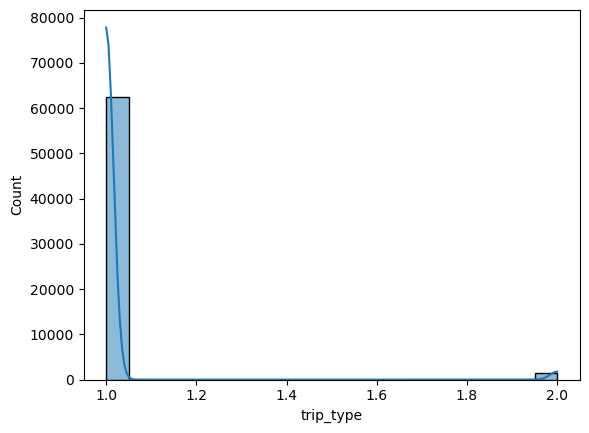

In [48]:
sns.histplot(df, x='trip_type', kde=True, bins=20)

- Kolom `trip_type` tidak terdistribusi dengan normal
- Maka saya isi dengan median

In [49]:
df['trip_type'].fillna(df['trip_type'].median(), inplace=True)

In [50]:
df['trip_type'].value_counts(dropna=False)

trip_type
1.0    66810
2.0     1401
Name: count, dtype: int64

In [51]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge     4324
pu_borough                  0
pu_zone                     0
do_borough                  0
do_zone                     0
dtype: int64

#### **3.4.5 Cleaning** `congestion_surcharge`
***Menangani anomali pada*** `congestion_surcharge`

In [52]:
df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
 0.00    46996
 2.75    16872
 NaN      4324
 2.50       16
-2.75        3
Name: count, dtype: int64

- `congestion_surcharge` < 0 akan dihapus
- dianggap sebagai outlier

In [53]:
df.drop(df[df['congestion_surcharge'] < 0].index, inplace=True)

In [54]:
df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
0.00    46996
2.75    16872
NaN      4324
2.50       16
Name: count, dtype: int64

***Mengisi missing value kolom*** `congestion_surcharge`

In [55]:
df['congestion_surcharge'].skew()

np.float64(1.0687751756981647)

<Axes: xlabel='congestion_surcharge', ylabel='Count'>

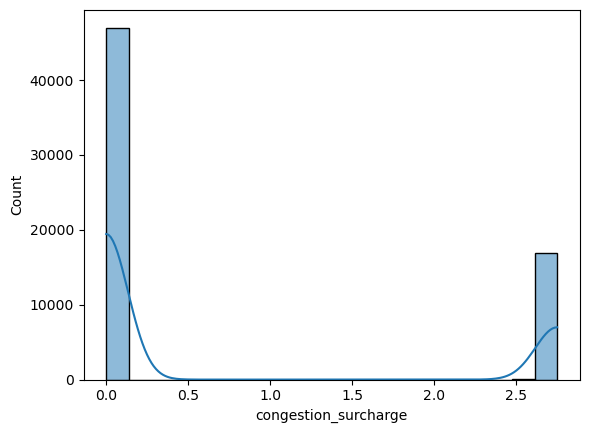

In [56]:
sns.histplot(df, x='congestion_surcharge', kde=True, bins=20)

- Kolom `congestion_surcharge` tidak terdistribusi dengan normal
- Maka saya isi dengan median

In [57]:
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

In [58]:
df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
0.00    51320
2.75    16872
2.50       16
Name: count, dtype: int64

In [59]:
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
pu_borough               0
pu_zone                  0
do_borough               0
do_zone                  0
dtype: int64

In [60]:
df.shape[0]

68208

-----------------------------------------

### **3.5 Pengecekan Outlier**
Melakukan pengecekan anomali pada kolom kolom numerik, dan akan dipertimbangkan untuk analisis

In [61]:
df.agg(['min', 'max'])

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,1,1,1.0,0.00,-70.0,-2.5,-0.50,-10.50,0.00,-1.0,-71.5,1.0,1.0,0.00,Bronx,Allerton/Pelham Gardens,Bronx,Allerton/Pelham Gardens
max,2023-02-01 03:10:05,2023-02-01 17:27:05,5.0,265,265,9.0,120098.84,490.0,12.5,2.75,222.22,36.05,1.0,491.0,5.0,2.0,2.75,Staten Island,Yorkville West,Staten Island,Yorkville West


#### **3.5.1 Pengecekan Kolom** `trip_distance`

In [62]:
df['trip_distance'].describe()

count     68208.000000
mean          8.114836
std         585.118818
min           0.000000
25%           1.110000
50%           1.850000
75%           3.210000
max      120098.840000
Name: trip_distance, dtype: float64

<Axes: xlabel='trip_distance'>

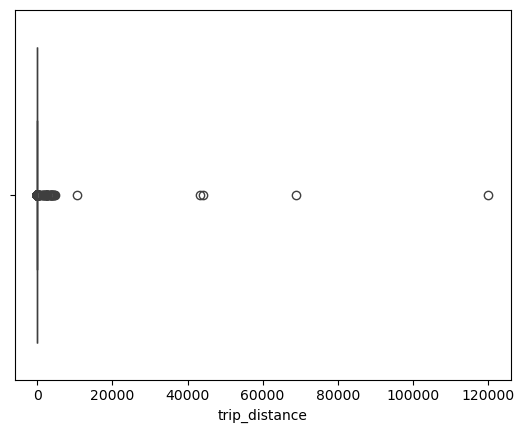

In [63]:
sns.boxplot(df, x='trip_distance')

In [64]:
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr

print(f'upper_bound: {upper_bound:.2f}, IQR: {iqr:.2f}')

upper_bound: 6.36, IQR: 2.10


In [65]:
df.query(f'trip_distance > {upper_bound}').shape[0]

5773

In [66]:
df.query('do_borough == "Unknown"').sort_values('trip_distance', ascending=False)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone


In [67]:
df.query(f'trip_distance > 100').shape[0]

37

***Hasil perhitungan IQR kolom*** `trip_distance`

- Perhitungan outlier dengan IQR berada pada nilai 6.36
- Jika 6.36 adalah outlier, maka 5773 data outlier
- Data yang dianggap outlier terlalu signifikan

***Menentukan nilai maksimum dari kolom*** `trip_distance`
- Setelah melakukan eksplorasi lebih lanjut berdasarkan wilayah dropoff serta kondisi real melalui google maps
- Nilai maksimum dari kolom `trip_distance` adalah 100 miles, karena lebih dari itu sudah diluar NYC bahkan beda State
- Maka nilai > 100 akan dihapus yaitu sebanyak 37 data

In [68]:
df.drop(df[df['trip_distance'] > 100].index, inplace=True)

In [69]:
df.shape[0]

68171

<Axes: xlabel='trip_distance'>

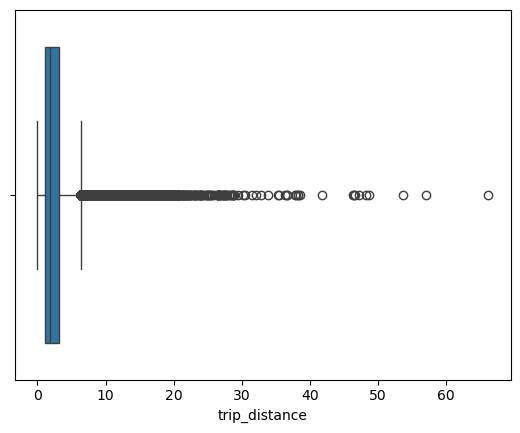

In [70]:
sns.boxplot(df, x='trip_distance')

***Menentukan nilai minimum dari kolom*** `trip_distance`
- Nilai minimum `trip_distance` harus > 0 
- Karena `trip_distance` = 0, diasumsikan perjalanan yang belum dimulai / cancel
- Maka data di filter berdasarkan `trip_distance` > 0

In [71]:
df.query('trip_distance == 0').shape[0]

3350

In [72]:
df.query('trip_distance == 0').shape[0] / df.shape[0]*100

4.914113039268898

- 3350 (4.9%) data `trip_distance` akan dihapus, walaupun signifikan tetapi data tersebut tidak digunakan

In [73]:
df.drop(df[df['trip_distance'] == 0].index, inplace=True)

In [74]:
df['trip_distance'].describe()

count    64821.000000
mean         2.808165
std          2.802903
min          0.010000
25%          1.220000
50%          1.930000
75%          3.320000
max         66.180000
Name: trip_distance, dtype: float64

In [75]:
df.shape[0]

64821

#### **3.5.2 Pengecekan Kolom** `fare_amount`

In [76]:
df['fare_amount'].describe()

count    64821.000000
mean        16.421870
std         12.458145
min        -70.000000
25%          9.300000
50%         13.000000
75%         19.590000
max        455.000000
Name: fare_amount, dtype: float64

<Axes: xlabel='fare_amount'>

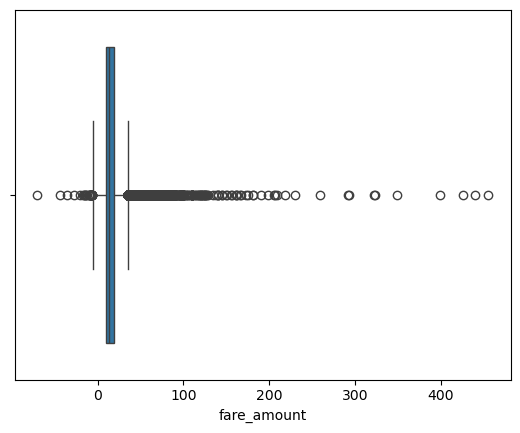

In [77]:
sns.boxplot(df, x='fare_amount')

In [78]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr

print(f'lower_bound: {lower_bound:.2f}, IQR: {iqr:.2f}')

lower_bound: -6.13, IQR: 10.29


In [79]:
df.query(f'fare_amount < {lower_bound}').shape[0]

32

In [80]:
df.query('fare_amount < 3').shape[0]

147

***Hasil perhitungan IQR kolom*** `fare_amount`

- Perhitungan outlier dengan IQR berada pada nilai -6.13
- Jika -6.13 sebagai batas minimum, maka nilai masih negatif

***Menentukan nilai minimum dari kolom*** `fare_amount`

Nilai minimum yang ditentukan adalah $3 berdasarkan peraturan yang telah ditetapkan oleh NYC TLC (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)

- Karena nilai $3 adalah biaya awal saat penumpang sudah masuk, meskipun belum jalan dan perjalanan dibatalkan
- Maka 332 data dengan nilai < 3 akan dihapus

In [81]:
df.drop(df[df['fare_amount'] < 3].index, inplace=True)

In [82]:
df.shape[0]

64674

#### **3.5.3 Pengecekan Kolom** `extra`

In [83]:
df['extra'].describe()

count    64674.000000
mean         0.857563
std          1.281204
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         12.500000
Name: extra, dtype: float64

#### **3.5.4 Pengecekan Kolom** `mta_tax`

In [84]:
df['mta_tax'].describe()

count    64674.000000
mean         0.579460
std          0.361822
min          0.000000
25%          0.500000
50%          0.500000
75%          0.500000
max          1.500000
Name: mta_tax, dtype: float64

#### **3.5.5 Pengecekan Kolom** `tip_amount`

In [85]:
df['tip_amount'].describe()

count    64674.000000
mean         2.198301
std          3.001989
min          0.000000
25%          0.000000
50%          1.820000
75%          3.410000
max        222.220000
Name: tip_amount, dtype: float64

<Axes: xlabel='tip_amount'>

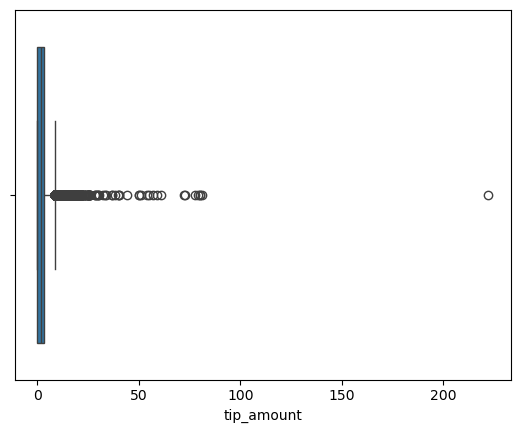

In [86]:
sns.boxplot(df, x='tip_amount')

In [87]:
q1 = df['tip_amount'].quantile(0.25)
q3 = df['tip_amount'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr

print(f'upper_bound: {upper_bound:.2f}, IQR: {iqr:.2f}')

upper_bound: 8.53, IQR: 3.41


In [88]:
df.query(f'tip_amount > 100')

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
50588,2023-01-25 18:24:30,2023-01-25 18:28:48,1.0,223,223,1.0,0.76,6.5,2.5,0.5,222.22,0.0,1.0,232.72,1.0,1.0,0.0,Queens,Steinway,Queens,Steinway


***Hasil perhitungan IQR kolom*** `tip_amount`

- Perhitungan outlier dengan IQR berada pada nilai 8.53
- Jika 8.53 sebagai batas maksimum, pembatasan nilai terlalu rendah

***Menentukan nilai maksimum dari kolom*** `tip_amount`

- Tip tertinggi yaitu $222, yang akan dihapus karena terlalu jauh dari rentang tip yang diberikan penumpang
- Maka tip_amount yang lebih dari $100 akan dihapuskan

In [89]:
df.drop(df[df['tip_amount'] > 100].index, inplace=True)

##### **3.5.6 Pengecekan Kolom** `total_amount`

In [90]:
df['total_amount'].describe()

count    64673.000000
mean        21.767337
std         14.531151
min          3.500000
25%         12.960000
50%         17.900000
75%         26.050000
max        456.000000
Name: total_amount, dtype: float64

In [91]:
df['total_amount'].min()

3.5

In [92]:
df.shape[0]

64673

Setelah pengecekan anomali dilakukan pada kolom kolom numerik dilakukan

- Nilai minimum masing masing kolom sudah ditentukan dengan data yang relevan
- Dengan nilai minimum untuk `fare_amount` sesuai aturan NYC TLC yaitu $3, maka anomali nilai pada semua kolom pun sudah tertangani juga
- Kolom kolom yang awalnya memiliki nilai negatif diasumsikan mengalami gangguan teknis
- Jumlah data sebelum dibuang anomali nya : 68208
- Jumlah data setelah dibuang anomali nya : 64673
- 3534 anomali sudah dibuang

-------------------------------------------------------------------

### **3.6 Cleaned Data**

***Data setelah dilakukan pembersihan :***

In [93]:
(df.isna().sum() / len(df) * 100).round(2).astype(str) + '%'

lpep_pickup_datetime     0.0%
lpep_dropoff_datetime    0.0%
RatecodeID               0.0%
PULocationID             0.0%
DOLocationID             0.0%
passenger_count          0.0%
trip_distance            0.0%
fare_amount              0.0%
extra                    0.0%
mta_tax                  0.0%
tip_amount               0.0%
tolls_amount             0.0%
improvement_surcharge    0.0%
total_amount             0.0%
payment_type             0.0%
trip_type                0.0%
congestion_surcharge     0.0%
pu_borough               0.0%
pu_zone                  0.0%
do_borough               0.0%
do_zone                  0.0%
dtype: object

In [94]:
list_nama_kolom = []
for col in df.columns:
    list_nama_kolom.append(col)

<Axes: >

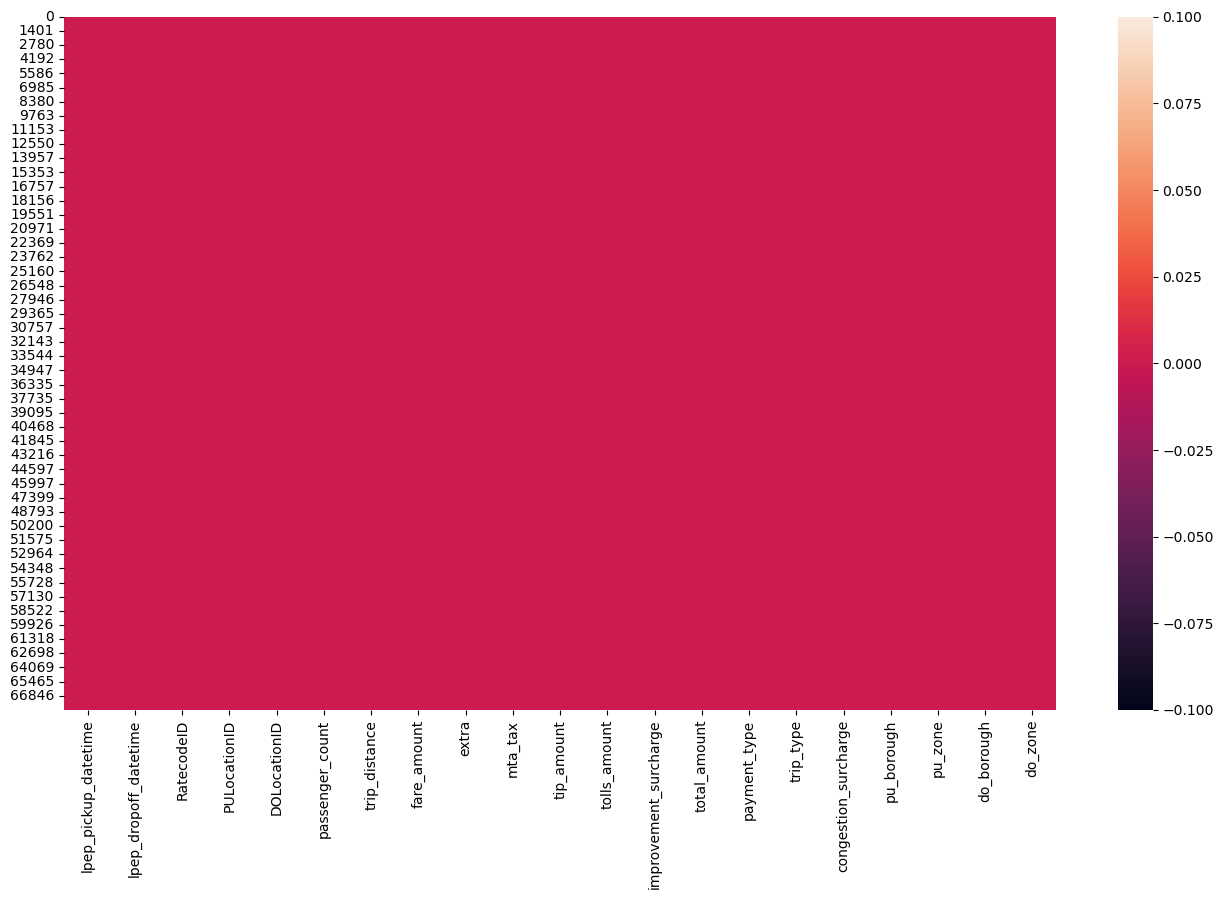

In [95]:
plt.figure(figsize=(16,9))
sns.heatmap(df[list_nama_kolom].isna())

In [96]:
df.shape[0]

64673

- Jumlah data sebelum dibersihkan : 68211

- Jumlah data setelah dibersihkan : 64673

- Data dengan missing value berhasil diisi dengan data yang dianggap relevan

- 4324 (6.34%) missing value berhasil diisi dengan data yang relevan

- 3535 (5.18%) anomali sudah dibuang

In [97]:
# Meyimpan data ke CSV
df.to_csv('NYC TLC Trip Record CLEAN.csv', index=False)

In [98]:
# Load ulang data yang sudah bersih
df = pd.read_csv('NYC TLC Trip Record CLEAN.csv')
df

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
3,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
4,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64668,2023-01-31 21:56:00,2023-01-31 22:14:00,1.0,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Manhattan,East Harlem South,Manhattan,Penn Station/Madison Sq West
64669,2023-01-31 22:40:00,2023-01-31 22:48:00,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Queens,Baisley Park,Queens,Saint Albans
64670,2023-01-31 23:46:00,2023-02-01 00:02:00,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South
64671,2023-01-31 23:01:00,2023-01-31 23:19:00,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights


-------------------------------------------------------------

### **3.7 Data Preprocessing**

Sebelum melakukan analisis, dilakukan terlebih dahulu pengkondisian data sehingga sesuai dengan kebutuhan analisis

#### **3.7.1 Mengubah Nilai Data Berdasarkan Artinya**


`RatecodeID`
- 1 = Standard rate
- 2 = JFK Airport
- 3 = Newark
- 4 = Nassau or Westchester
- 5 = Negotiated fare
- 6 = Group ride

In [99]:
df['RatecodeID'].replace({1: 'Standard Rate', 
                          2: 'JFK Airport', 
                          3: 'Newark', 
                          4: 'Nassau/Westchester', 
                          5: 'Negotiated', 
                          6: 'Group RIde'}, 
                          inplace=True)

In [100]:
df['RatecodeID'].value_counts()

RatecodeID
Standard Rate         63523
Negotiated              946
JFK Airport             131
Nassau/Westchester       53
Newark                   20
Name: count, dtype: int64

`payment_type`
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [101]:
df['payment_type'].replace({1: 'Credit Card', 
                            2: 'Cash', 
                            3: 'No Charge', 
                            4: 'Dispute', 
                            5: 'Unknown', 
                            6: 'Voided Trip'},
                            inplace=True)

In [102]:
df['payment_type'].value_counts()

payment_type
Credit Card    38437
Cash           21837
Unknown         4130
No Charge        221
Dispute           48
Name: count, dtype: int64

`trip_type`
- 1 = Street-hail
- 2 = Dispatch

In [103]:
df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'}, inplace=True)

In [104]:
df['trip_type'].value_counts()

trip_type
Street-hail    63833
Dispatch         840
Name: count, dtype: int64

#### **3.7.2 Mengubah Kolom Tanggal ke Datetime**
Melakukan pengubahan kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi datetime

In [105]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64673 entries, 0 to 64672
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   64673 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  64673 non-null  datetime64[ns]
 2   RatecodeID             64673 non-null  object        
 3   PULocationID           64673 non-null  int64         
 4   DOLocationID           64673 non-null  int64         
 5   passenger_count        64673 non-null  float64       
 6   trip_distance          64673 non-null  float64       
 7   fare_amount            64673 non-null  float64       
 8   extra                  64673 non-null  float64       
 9   mta_tax                64673 non-null  float64       
 10  tip_amount             64673 non-null  float64       
 11  tolls_amount           64673 non-null  float64       
 12  improvement_surcharge  64673 non-null  float64       
 13  t

- Menghapus data dengan tahun selain 2023

In [107]:
df.query('lpep_pickup_datetime.dt.year < 2023')

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
272,2022-12-09 14:10:49,2022-12-09 14:22:26,Standard Rate,7,56,1.0,5.37,16.0,0.0,0.5,0.0,0.00,0.3,16.8,Cash,Street-hail,0.00,Queens,Astoria,Queens,Corona
291,2022-12-09 14:55:42,2022-12-09 15:33:06,Standard Rate,260,164,1.0,5.48,25.5,0.0,0.5,0.0,6.55,0.3,35.6,Cash,Street-hail,2.75,Queens,Woodside,Manhattan,Midtown South
16896,2009-01-01 20:21:27,2009-01-02 11:07:31,Standard Rate,65,178,1.0,7.72,34.5,0.0,0.5,7.2,0.00,1.0,43.2,Credit Card,Street-hail,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South


In [108]:
df.drop(df[df['lpep_pickup_datetime'].dt.year < 2023].index, inplace=True)

In [109]:
df.shape[0]

64670

- Menghapus data selain bulan 1 (Januari)

In [110]:
df['lpep_pickup_datetime'].dt.month.value_counts()

lpep_pickup_datetime
1    64669
2        1
Name: count, dtype: int64

In [111]:
df[df['lpep_pickup_datetime'].dt.month == 2]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone
23703,2023-02-01 03:10:05,2023-02-01 03:40:35,Negotiated,82,198,2.0,4.58,28.0,0.0,0.0,5.66,0.0,0.3,33.96,Credit Card,Dispatch,0.0,Queens,Elmhurst,Queens,Ridgewood


In [112]:
df.drop(df[df['lpep_pickup_datetime'].dt.month == 2].index, inplace=True)

In [113]:
df['lpep_pickup_datetime'].dt.month.value_counts()

lpep_pickup_datetime
1    64669
Name: count, dtype: int64

#### **3.7.3 Penambahan Kolom**
Menambah kolom detail waktu dari data yang ada. Untuk memudahkan analisis lebih lanjut

***Membuat kolom*** `trip_duration` ***dalam menit***

In [114]:
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration'] = round(df['trip_duration'].dt.total_seconds()/(60),2)

In [115]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.02
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.77
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.82
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.97
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.55


***Menghapus durasi trip = 0***
- Diasumsikan karena perjalanan yang di cancel 

In [116]:
df[df['trip_duration'] == 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration
6763,2023-01-05 07:54:34,2023-01-05 07:54:34,Standard Rate,42,42,1.0,1.90,12.8,0.0,1.5,0.0,0.0,1.0,14.3,Cash,Street-hail,0.0,Manhattan,Central Harlem North,Manhattan,Central Harlem North,0.0
14904,2023-01-09 10:16:27,2023-01-09 10:16:27,Negotiated,40,264,1.0,0.09,17.0,0.0,0.0,3.4,0.0,0.0,20.4,Credit Card,Dispatch,0.0,Brooklyn,Carroll Gardens,Outside of NYC,Outside of NYC,0.0
40694,2023-01-22 10:38:23,2023-01-22 10:38:23,Negotiated,264,264,1.0,0.18,20.0,0.0,0.0,0.0,0.0,0.0,20.0,Credit Card,Dispatch,0.0,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,0.0


In [117]:
df.drop(df[df['trip_duration'] == 0].index, inplace=True)

In [118]:
df.shape[0]

64666

***Menghapus durasi trip yang terlalu lama***

<Axes: xlabel='trip_duration'>

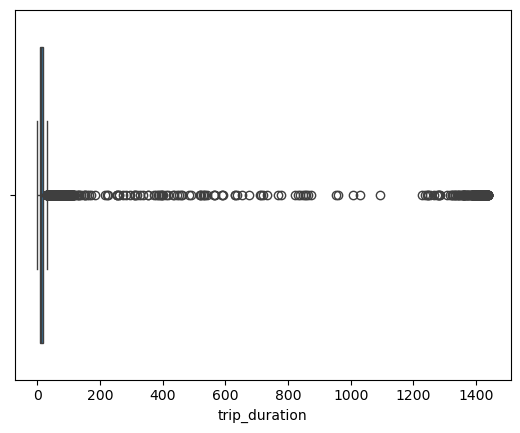

In [119]:
sns.boxplot(df, x='trip_duration')

In [120]:
q1 = df['trip_duration'].quantile(0.25)
q3 = df['trip_duration'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr

print(f'upper_bound: {upper_bound:.2f}, IQR: {iqr:.2f}')

upper_bound: 32.12, IQR: 9.88


- jika dilihat dari upper bound hasil perhitungan IQR, upper bound berada di **32.12 menit**

- namun nilai tersebut terlalu rendah jika ditetapkan sebagai pembatas data

- karena berdasarkan `trip_distance` terjauh dan speed minimum di NYC yaitu **40 mph**, durasi terlama ada di **1.65 jam** jika driving speed rata rata **40 mph**

- saya beri toleransi **1.35 jam** juga untuk kondisi diluar dugaan seperti kemacetan

- maka pembatasan data di `trip_duration` **180 menit (3jam)**

In [121]:
print(f'Jarak terjauh : {df['trip_distance'].max()}, Durasi terlama : {df['trip_distance'].max() / 40:.2f}')

Jarak terjauh : 66.18, Durasi terlama : 1.65


In [122]:
df.drop(df[df['trip_duration'] > 180].index, inplace=True)

In [123]:
df.shape[0]

64413

<Axes: xlabel='trip_duration'>

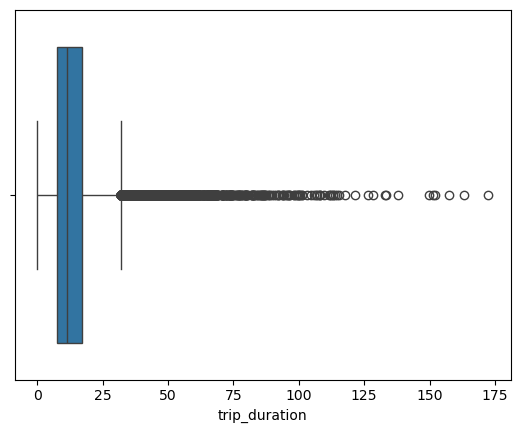

In [124]:
sns.boxplot(df, x='trip_duration')

***Membuat kolom*** `pu_hour`

In [125]:
df['pu_hour'] = df['lpep_pickup_datetime'].dt.hour
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration,pu_hour
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.02,0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.77,0
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.82,0
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.97,0
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.55,0


***Membuat kolom nama hari*** `pu_day`

In [126]:
df['pu_day'] = df['lpep_pickup_datetime'].dt.day_name()
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration,pu_hour,pu_day
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.02,0,Sunday
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.77,0,Sunday
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.82,0,Sunday
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.97,0,Sunday
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.55,0,Sunday


***Mengelompokkan hari `Weekdays/Weekend`***

In [127]:
day_mapping = {
    'Monday': 'Weekdays',
    'Tuesday': 'Weekdays',
    'Wednesday': 'Weekdays',
    'Thursday': 'Weekdays',
    'Friday': 'Weekdays',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend'
}

df['day_category'] = df['pu_day'].map(day_mapping)
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration,pu_hour,pu_day,day_category
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.02,0,Sunday,Weekend
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.77,0,Sunday,Weekend
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.82,0,Sunday,Weekend
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.97,0,Sunday,Weekend
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.55,0,Sunday,Weekend


***Membuat kolom pu_date***

In [128]:
df['pu_date'] = df['lpep_pickup_datetime'].dt.day
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration,pu_hour,pu_day,day_category,pu_date
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.02,0,Sunday,Weekend,1
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.77,0,Sunday,Weekend,1
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.82,0,Sunday,Weekend,1
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.97,0,Sunday,Weekend,1
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.55,0,Sunday,Weekend,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64413 entries, 0 to 64672
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   64413 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  64413 non-null  datetime64[ns]
 2   RatecodeID             64413 non-null  object        
 3   PULocationID           64413 non-null  int64         
 4   DOLocationID           64413 non-null  int64         
 5   passenger_count        64413 non-null  float64       
 6   trip_distance          64413 non-null  float64       
 7   fare_amount            64413 non-null  float64       
 8   extra                  64413 non-null  float64       
 9   mta_tax                64413 non-null  float64       
 10  tip_amount             64413 non-null  float64       
 11  tolls_amount           64413 non-null  float64       
 12  improvement_surcharge  64413 non-null  float64       
 13  total_

#### **3.7.4 Pengecekan Total Pembayaran yang Valid**
Total pembayaran yang dianggap valid adalah total pembayaran yang sesuai hasil penambahan kolom :
- `fare_amount` + `extra` + `mta_tax` + `tip_amount` + `tolls_amount` + `improvement_surcharge` + `congestion_surcharge`

***Membuat kolom*** `total_payment` (perhitungan manual) ***untuk dicek apakah sudah sama dengan kolom*** `total_amount` (perhitungan dari sistem)

In [130]:
df['total_payment'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'] + df['congestion_surcharge']

In [131]:
df

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pu_borough,pu_zone,do_borough,do_zone,trip_duration,pu_hour,pu_day,day_category,pu_date,total_payment
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.02,0,Sunday,Weekend,1,24.18
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.77,0,Sunday,Weekend,1,15.84
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.82,0,Sunday,Weekend,1,11.20
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.97,0,Sunday,Weekend,1,9.00
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.55,0,Sunday,Weekend,1,22.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64668,2023-01-31 21:56:00,2023-01-31 22:14:00,Standard Rate,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,Unknown,Street-hail,0.00,Manhattan,East Harlem South,Manhattan,Penn Station/Madison Sq West,18.00,21,Tuesday,Weekdays,31,22.27
64669,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard Rate,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,Unknown,Street-hail,0.00,Queens,Baisley Park,Queens,Saint Albans,8.00,22,Tuesday,Weekdays,31,5.41
64670,2023-01-31 23:46:00,2023-02-01 00:02:00,Standard Rate,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,Unknown,Street-hail,0.00,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,16.00,23,Tuesday,Weekdays,31,21.04
64671,2023-01-31 23:01:00,2023-01-31 23:19:00,Standard Rate,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,Unknown,Street-hail,0.00,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights,18.00,23,Tuesday,Weekdays,31,19.18


In [132]:
df['total_check'] = df['total_amount'] == df['total_payment']

In [133]:
df['total_check'].value_counts()

total_check
True     49707
False    14706
Name: count, dtype: int64

- 14736 (22.7%) Data memiliki kesalahan perhitungan
- Untuk tahap analisis, kolom `total_payment` yang akan digunakan

-------------------------------------------------------
-------------------------------------------------------

## **4. Data Analysis**

Setelah melakukan tahap cleaning dan preprocessing, analisis data bisa dilakukan

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64413 entries, 0 to 64672
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   64413 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  64413 non-null  datetime64[ns]
 2   RatecodeID             64413 non-null  object        
 3   PULocationID           64413 non-null  int64         
 4   DOLocationID           64413 non-null  int64         
 5   passenger_count        64413 non-null  float64       
 6   trip_distance          64413 non-null  float64       
 7   fare_amount            64413 non-null  float64       
 8   extra                  64413 non-null  float64       
 9   mta_tax                64413 non-null  float64       
 10  tip_amount             64413 non-null  float64       
 11  tolls_amount           64413 non-null  float64       
 12  improvement_surcharge  64413 non-null  float64       
 13  total_

In [135]:
display(df.describe(), df.describe(include='object'))

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,pu_hour,pu_date,total_payment
count,64413,64413,64413.000000,64413.000000,64413.00000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000,64413.000000
mean,2023-01-16 22:36:38.880816128,2023-01-16 22:50:21.297998848,97.409591,138.258706,1.30941,2.805793,16.440890,0.858165,0.579836,2.197452,0.155589,0.957835,21.741215,0.711293,13.706961,13.870663,16.343362,21.901060
min,2023-01-01 00:01:31,2023-01-01 00:13:26,3.000000,1.000000,1.00000,0.010000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.020000,0.000000,1.000000,3.500000
25%,2023-01-09 12:27:36,2023-01-09 12:39:13,74.000000,74.000000,1.00000,1.220000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,0.000000,7.380000,10.000000,9.000000,13.100000
50%,2023-01-17 09:18:02,2023-01-17 09:32:10,75.000000,138.000000,1.00000,1.940000,13.000000,0.000000,0.500000,1.820000,0.000000,1.000000,17.900000,0.000000,11.400000,15.000000,17.000000,18.000000
75%,2023-01-24 16:09:01,2023-01-24 16:23:05,116.000000,220.000000,1.00000,3.330000,19.640000,1.000000,0.500000,3.410000,0.000000,1.000000,26.050000,2.750000,17.220000,18.000000,24.000000,26.340000
max,2023-01-31 23:58:23,2023-02-01 00:31:14,265.000000,265.000000,8.00000,57.090000,455.000000,12.500000,1.500000,80.880000,36.050000,1.000000,456.000000,2.750000,172.480000,23.000000,31.000000,456.000000
std,NaN,NaN,60.013099,76.511728,0.96048,2.771541,12.247911,1.281584,0.362308,2.874469,1.047218,0.167427,14.384252,1.204153,9.770594,5.210271,8.778567,14.363113


,RatecodeID,payment_type,trip_type,pu_borough,pu_zone,do_borough,do_zone,pu_day,day_category
count,64413,64413,64413,64413,64413,64413,64413,64413,64413
unique,5,5,2,6,196,7,243,7,2
top,Standard Rate,Credit Card,Street-hail,Manhattan,East Harlem North,Manhattan,East Harlem South,Tuesday,Weekdays
freq,63281,38288,63586,38490,12955,38591,3414,10627,48493


****Melakukan uji normalitas data pada kolom numerik dengan data kontinu :****

In [136]:
from scipy.stats import shapiro

list_kolom_numeric = ['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','trip_duration','total_payment']
list_pv = []
list_hasil_uji = []

df_sample = df.sample(min(len(df), 2000), random_state=42)

for i in list_kolom_numeric:
    stats, pvalue = shapiro(df_sample[i])

    if pvalue >= 0.05:
        hasil = 'Terdistribusi normal' # Gagal menolak H0
    else:
        hasil = 'Tidak terdistribusi normal' # Menolak H0
    
    list_pv.append(pvalue)
    list_hasil_uji.append(hasil)

In [137]:
uji_normalitas = pd.DataFrame({'kolom':list_kolom_numeric,
                               'pvalue':list_pv,
                               'hasil':list_hasil_uji})
uji_normalitas

,kolom,pvalue,hasil
0,passenger_count,5.416224e-64,Tidak terdistribusi normal
1,trip_distance,1.607839e-50,Tidak terdistribusi normal
2,fare_amount,2.340824e-46,Tidak terdistribusi normal
3,extra,1.520036e-52,Tidak terdistribusi normal
4,mta_tax,5.522222e-57,Tidak terdistribusi normal
5,tip_amount,9.348269e-49,Tidak terdistribusi normal
6,tolls_amount,3.466840e-70,Tidak terdistribusi normal
7,improvement_surcharge,1.728763e-67,Tidak terdistribusi normal
8,congestion_surcharge,2.353140e-58,Tidak terdistribusi normal
9,trip_duration,1.663266e-38,Tidak terdistribusi normal


---------------------------------------------

### **4.1 Goals 1 : Mencari lokasi yang ramai permintaan**

#### **4.1.1 Jumlah permintaan berdasarkan borough**

In [138]:
pu_borough_count = df['pu_borough'].value_counts().sort_values(ascending=False).to_frame()
pu_borough_count

,count
pu_borough,
Manhattan,38490
Queens,16543
Brooklyn,8436
Bronx,884
Outside of NYC,51
Staten Island,9


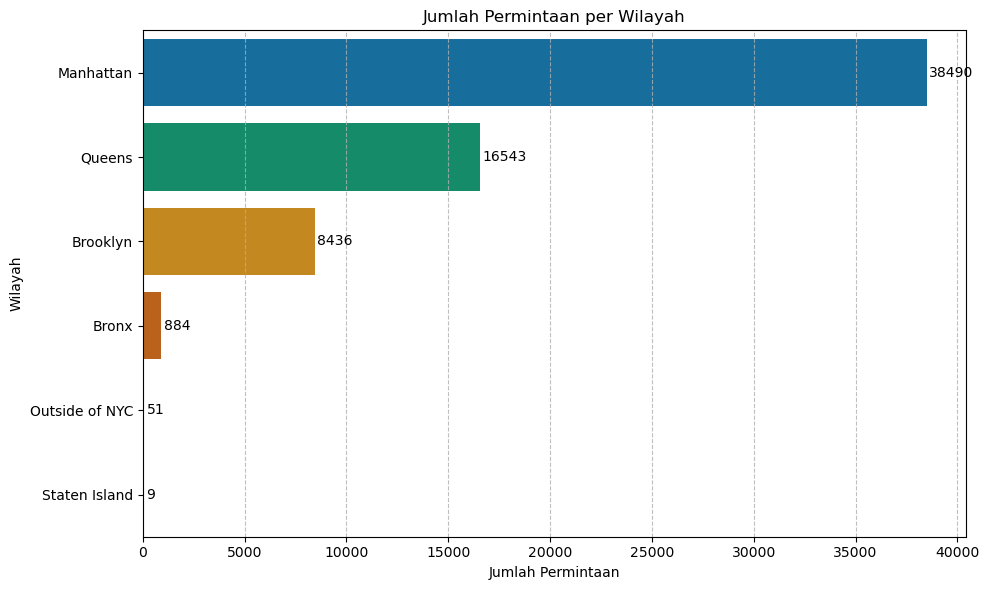

In [139]:
plt.figure(figsize=(10,6))

ax = sns.countplot(df, y='pu_borough', order=pu_borough_count.index, hue='pu_borough', palette='colorblind')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2)

plt.title('Jumlah Permintaan per Wilayah')
plt.xlabel('Jumlah Permintaan')
plt.ylabel('Wilayah')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Insight :

- `Manhattan` merupakan wilayah dengan permintaan **tertinggi**, yang memiliki jumlah pickup terbanyak diantara wilayah lain
- Wilayah dengan jumlah permintaan **tertinggi kedua** ada di `Queens`
- Wilayah dengan jumlah permintaan **tertinggi ketiga** ada di `Brooklyn`

Kita fokuskan persiapan/ketersediaan armada di 3 wilayah tersebut

#### **4.1.2 Jumlah permintaan berdasarkan zone**

In [140]:
pu_zone_count = df.groupby(['pu_borough','pu_zone'])['lpep_pickup_datetime'].count().sort_values(ascending=False).to_frame().head(10)
pu_zone_count

lpep_pickup_datetime
pu_borough pu_zone                                       
Manhattan  East Harlem North                        12955
           East Harlem South                         8911
           Central Harlem                            3942
           Morningside Heights                       3833
Queens     Forest Hills                              3673
Manhattan  Central Park                              2840
Queens     Elmhurst                                  2830
Brooklyn   Fort Greene                               2126
Manhattan  Washington Heights South                  1776
Queens     Astoria                                   1763

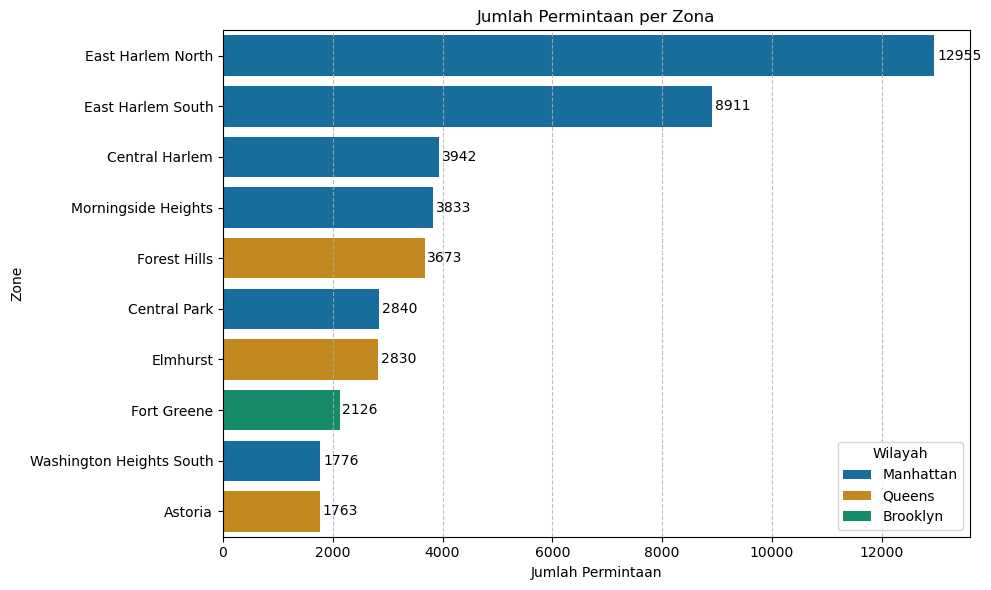

In [141]:
plt.figure(figsize=(10,6))

ax = sns.barplot(pu_zone_count, y='pu_zone', x='lpep_pickup_datetime', hue='pu_borough', palette='colorblind')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2)

plt.title('Jumlah Permintaan per Zona')
ax.legend(title='Wilayah')
plt.xlabel('Jumlah Permintaan')
plt.ylabel('Zone')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Insight
- Zona dengan jumlah permintaan **tertinggi** berada pada zona wilayah **Manhattan** yaitu `(East Harlem North dan South, Central Harlem, Morningside Heights)`
- Zona dengan jumlah permintaan tertinggi **kedua** berada pada zona wilayah **Queens** yaitu `(Forest Hills, Elmhurst)`
- Zona dengan jumlah permintaan tertinggi **ketiga** berada pada zona wilayah **Brooklyn** yaitu `Fort Greene`

Zona zona tersebut akan menjadi pusat perhatian **utama** untuk menyiapkan ketersediaan armada disekitar zona tersebut

---------------------------------------------

### **4.2 Goals 2 : Mencari waktu yang ramai permintaan**

#### **4.2.1 Jumlah permintaan berdasarkan hari**

In [142]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [143]:
pu_day_count = df['pu_day'].value_counts().reindex(day_order).to_frame()
pu_day_count

,count
pu_day,
Monday,9421
Tuesday,10627
Wednesday,9321
Thursday,9635
Friday,9489
Saturday,8057
Sunday,7863


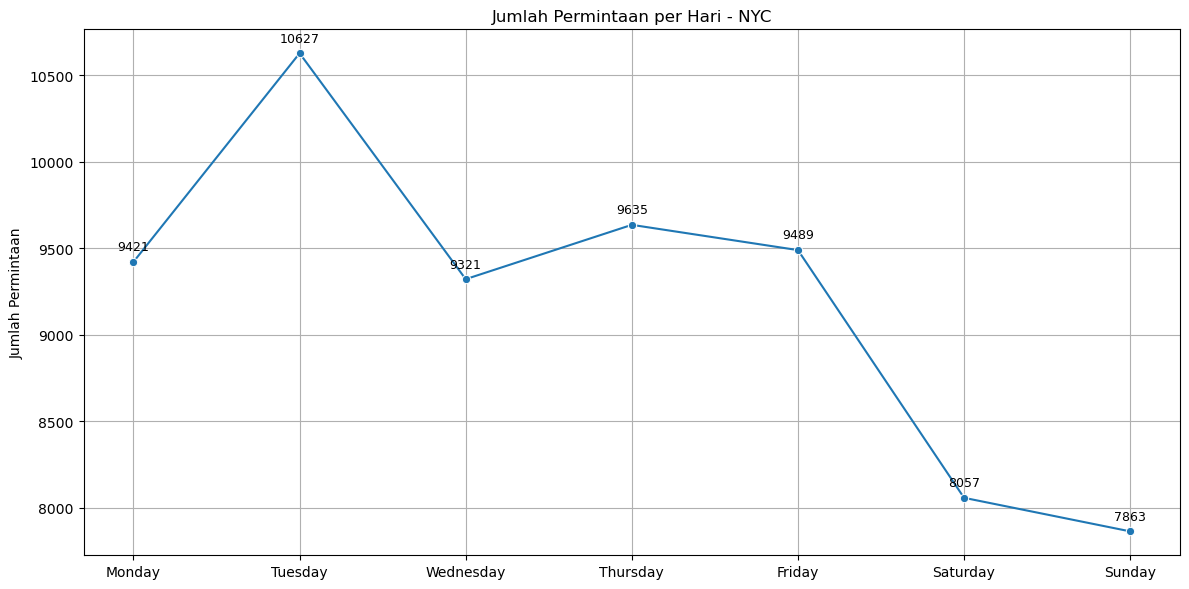

In [144]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(pu_day_count, x='pu_day', y='count', marker='o')

for x, y in zip(pu_day_count.index, pu_day_count['count']):
    ax.text(x, y+50, str(y), ha='center', va='bottom', fontsize=9, color='black')

plt.grid(True)
plt.title('Jumlah Permintaan per Hari - NYC')
plt.xlabel('')
plt.ylabel('Jumlah Permintaan')
plt.tight_layout()
plt.show()

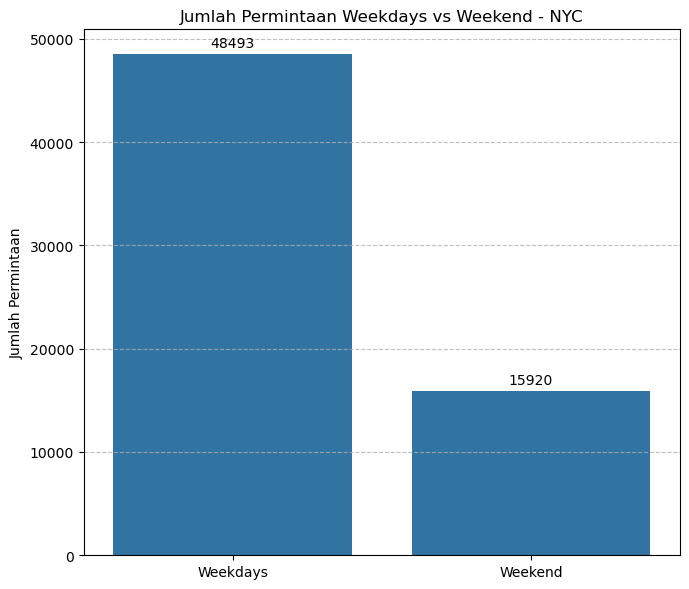

In [145]:
plt.figure(figsize=(7,6))

ax = sns.countplot(x=df['day_category'], order=df['day_category'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=3)

plt.title('Jumlah Permintaan Weekdays vs Weekend - NYC')
plt.xlabel('')
plt.ylabel('Jumlah Permintaan')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

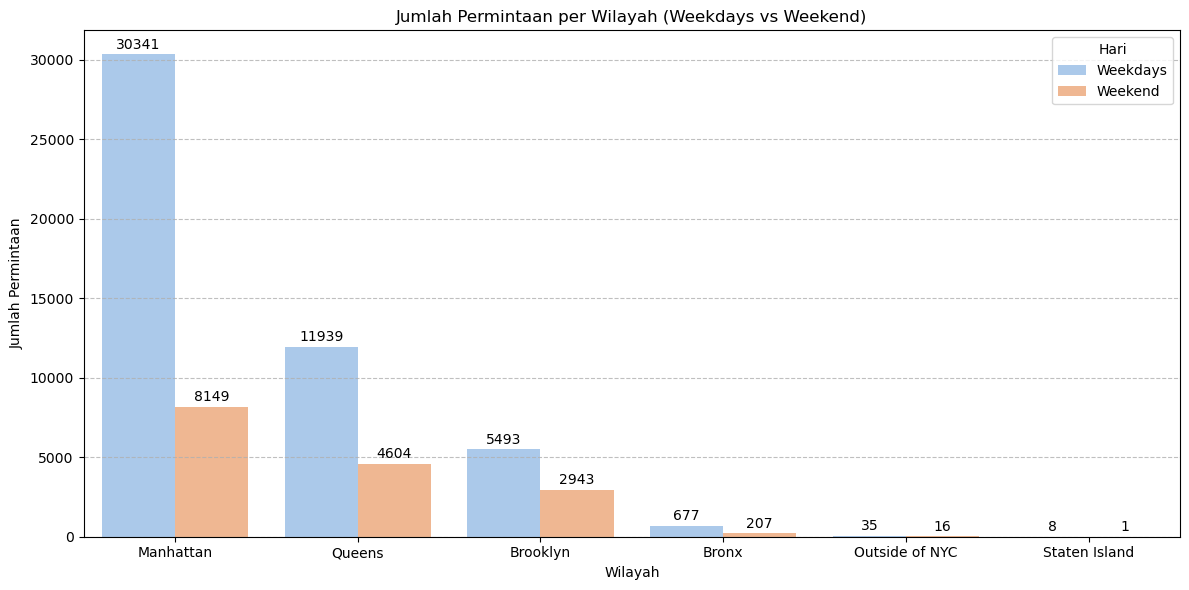

In [146]:
plt.figure(figsize=(12,6))

ax = sns.countplot(df, x='pu_borough', order=pu_borough_count.index, hue='day_category', hue_order=['Weekdays','Weekend'], palette='pastel')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2)

plt.title('Jumlah Permintaan per Wilayah (Weekdays vs Weekend)')
plt.legend(title='Hari')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Permintaan')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

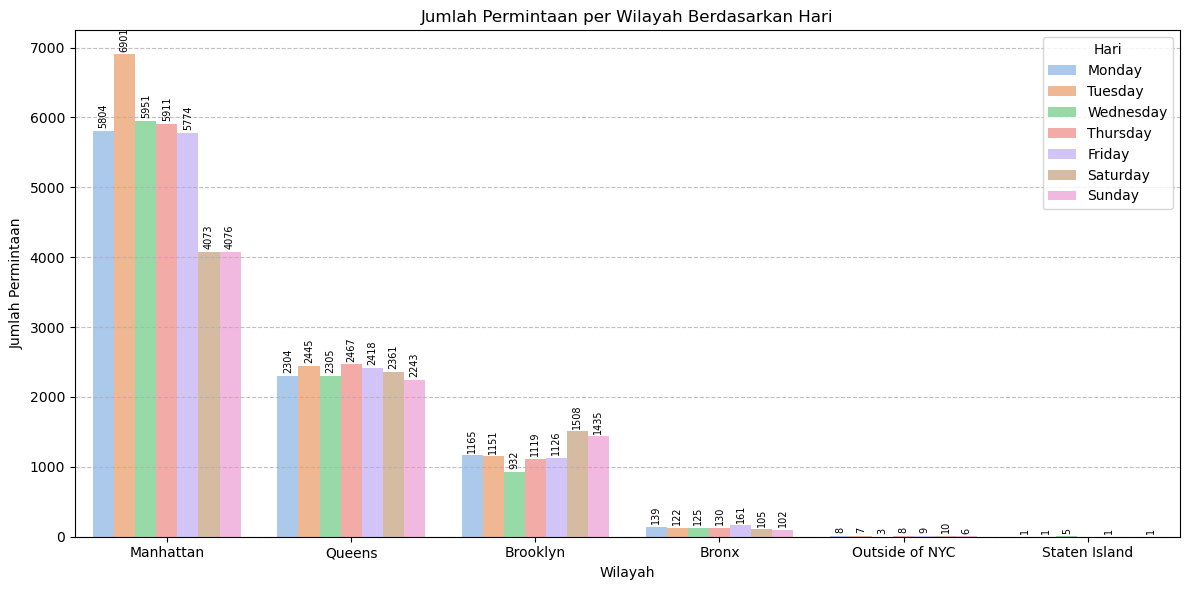

In [147]:
plt.figure(figsize=(12,6))

ax = sns.countplot(df, x='pu_borough', order=pu_borough_count.index, hue='pu_day', hue_order=day_order, palette='pastel')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2, rotation=90, fontsize=7)

plt.title('Jumlah Permintaan per Wilayah Berdasarkan Hari')
plt.legend(title='Hari')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Permintaan')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [148]:
selected_borough = ['Manhattan','Queens','Brooklyn']

In [149]:
pu_day_count2 = df[df['pu_borough'].isin(selected_borough)].groupby(['pu_borough','pu_day']).size().reset_index(name='count')
pu_day_count2.head()

,pu_borough,pu_day,count
0,Brooklyn,Friday,1126
1,Brooklyn,Monday,1165
2,Brooklyn,Saturday,1508
3,Brooklyn,Sunday,1435
4,Brooklyn,Thursday,1119


In [150]:
pu_day_count2['pu_day'] = pd.Categorical(pu_day_count2['pu_day'], categories=day_order, ordered=True)
pu_day_count2 = pu_day_count2.sort_values('pu_day')

In [151]:
palette_colors = {'Manhattan':'red', 'Queens':'green', 'Brooklyn':'blue'}

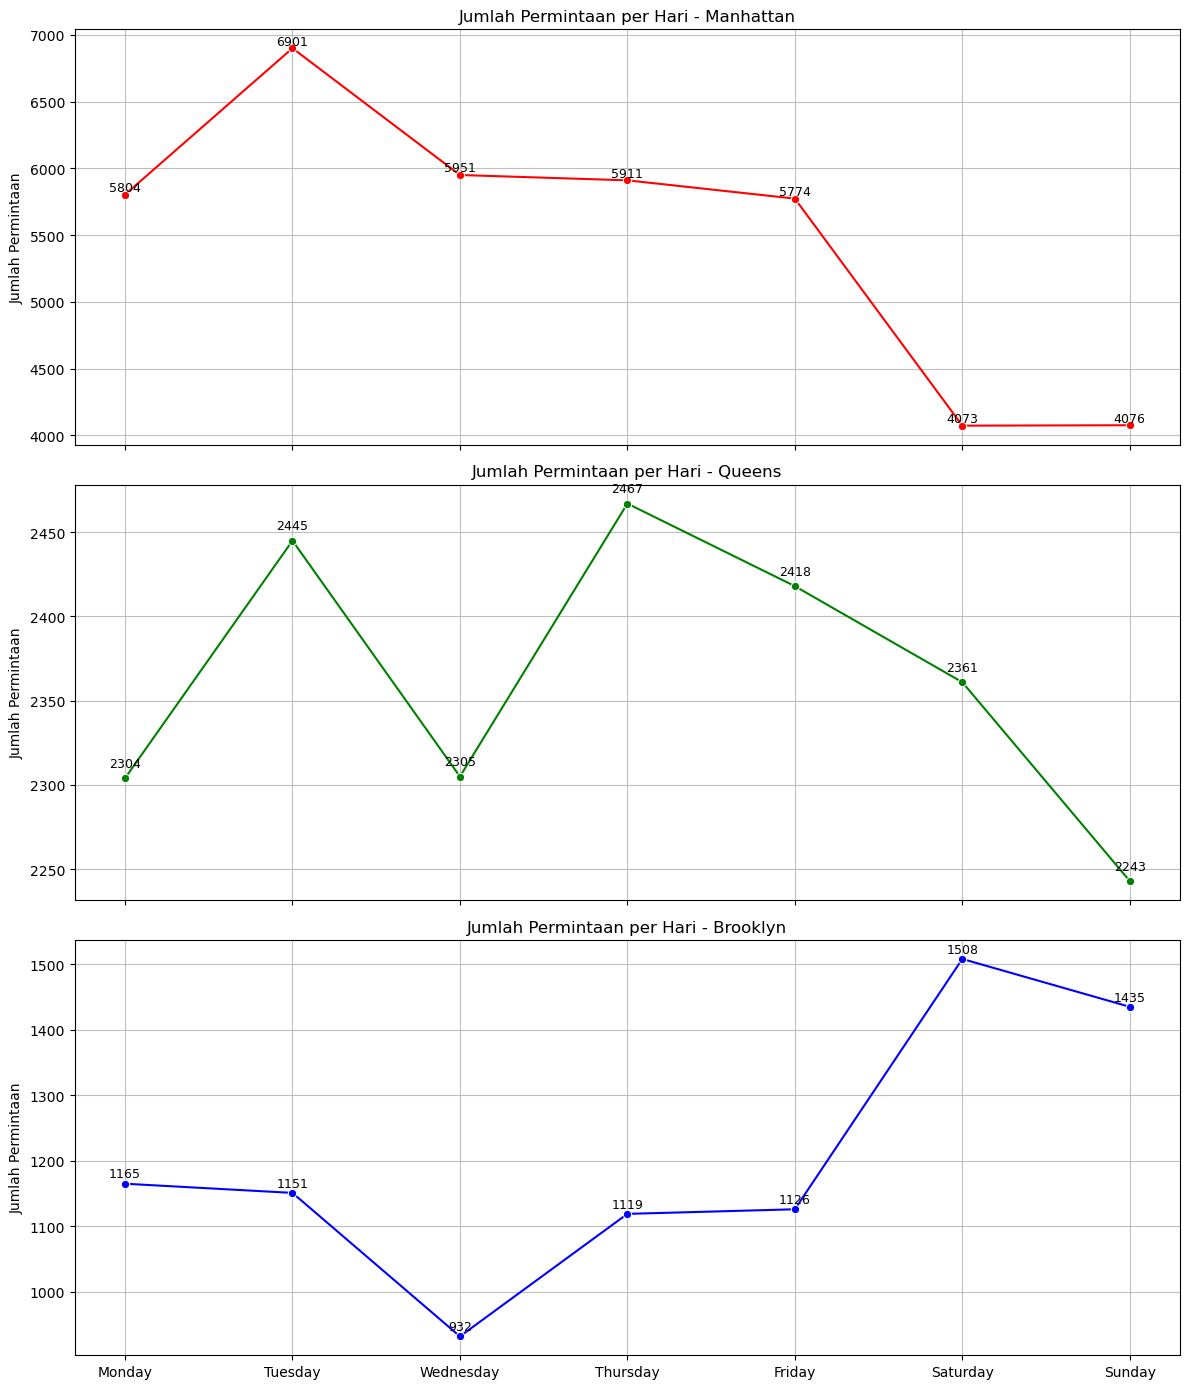

In [152]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

for ax, borough in zip(axes, selected_borough):
    subset = pu_day_count2[pu_day_count2['pu_borough'] == borough]
    sns.lineplot(data=subset, x='pu_day', y='count', marker='o', color=palette_colors[borough], ax=ax)
    ax.set_title(f'Jumlah Permintaan per Hari - {borough}')
    ax.set_ylabel('Jumlah Permintaan')
    ax.set_xlabel('')
    ax.grid(True, alpha=0.8)

    for x, y in zip(subset['pu_day'], subset['count']):
        ax.text(x, y+5, str(y), ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Insight
- Dari semua wilayah, hari **weekdays** lebih tinggi permintaannya
- Namun pada wilayah `Brooklyn` jika berdasarkan **harinya**, permintaan justru lebih tinggi di **weekend**
- Namun pada wilayah `Brooklyn` jika ditotalkan jumlah permintaannya untuk weekdays dan weekend, tetap **total** jumlah permintaan tinggi di **weekdays**

Kita fokuskan ketersediaan armada pada hari hari kerja **(weekdays)**

Untuk wilayah `Brooklyn`, kita tambahkan armada pada akhir pekan **(weekend)**, dengan mengalihkan beberapa armada **weekend** pada wilayah lain

#### **4.2.2 Jumlah permintaan berdasarkan tanggal**

In [153]:
pu_date_count = df['pu_date'].value_counts().sort_index().reset_index()
pu_date_count.head()

,pu_date,count
0,1,1379
1,2,1481
2,3,1995
3,4,2243
4,5,2278


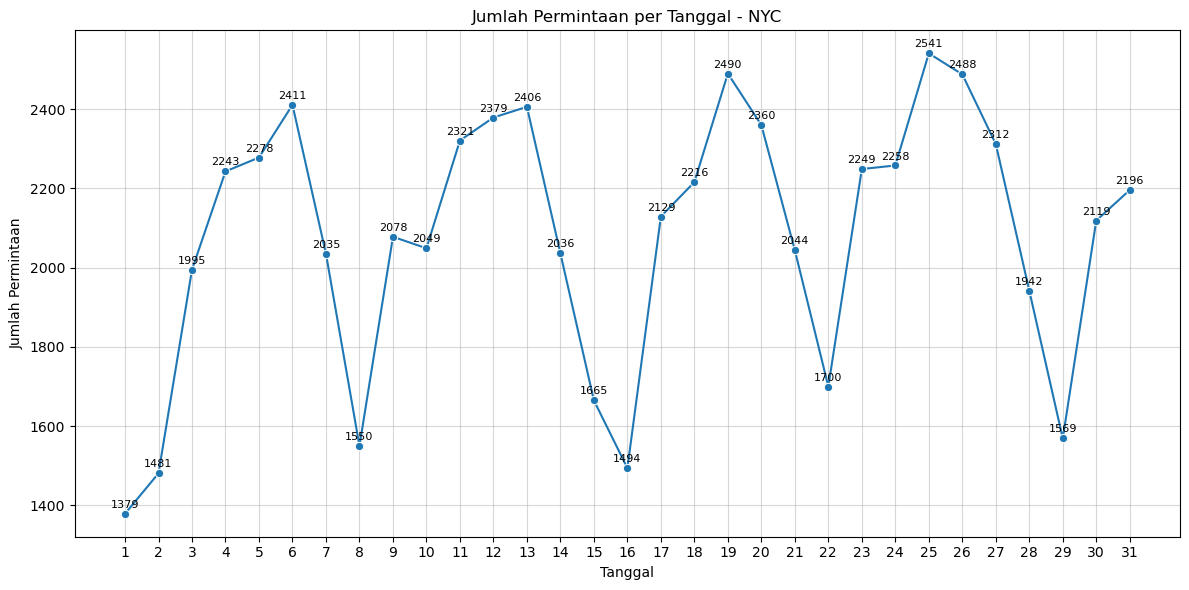

In [154]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(pu_date_count, x='pu_date', y='count', marker='o')
ax.set_xticks(pu_date_count['pu_date'])

for x, y in zip(pu_date_count['pu_date'], pu_date_count['count']):
    ax.text(x, y+10, str(y), ha='center', va='bottom', fontsize=8, color='black')

plt.title("Jumlah Permintaan per Tanggal - NYC")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Permintaan")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Insight :

- Jumlah permintaan taksi di Kota New York yang tinggi berada pada tanggal **6, 13, 19, 25 dan 26** dimana mobilitas masyarakat terbilang tinggi pada tanggal tersebut, dan jika dilihat ke kalender, tanggal tersebut adalah hari hari kerja
- Jika dilihat ke **kalender USA Januari 2023** terdapat beberapa event yaitu tanggal **1 dan 2** adalah **perayaan Tahun Baru** dimana mobilitas masyarakat tidak tinggi walaupun hari tersebut adalah hari kerja, karena adanya **libur Tahun Baru**
- Tanggal **16** adalah hari libur **Martin Luther King Jr.** sehingga jumlah permintaan terbilang **rendah**

Maka kita fokuskan kesiapan armada pada tanggal yang bukan libur atau hari kerja (weekdays)


In [155]:
pu_date_count2 = df[df['pu_borough'].isin(selected_borough)].groupby(['pu_borough','pu_date']).size().reset_index(name='count')
pu_date_count2.head()

,pu_borough,pu_date,count
0,Brooklyn,1,237
1,Brooklyn,2,216
2,Brooklyn,3,229
3,Brooklyn,4,223
4,Brooklyn,5,294


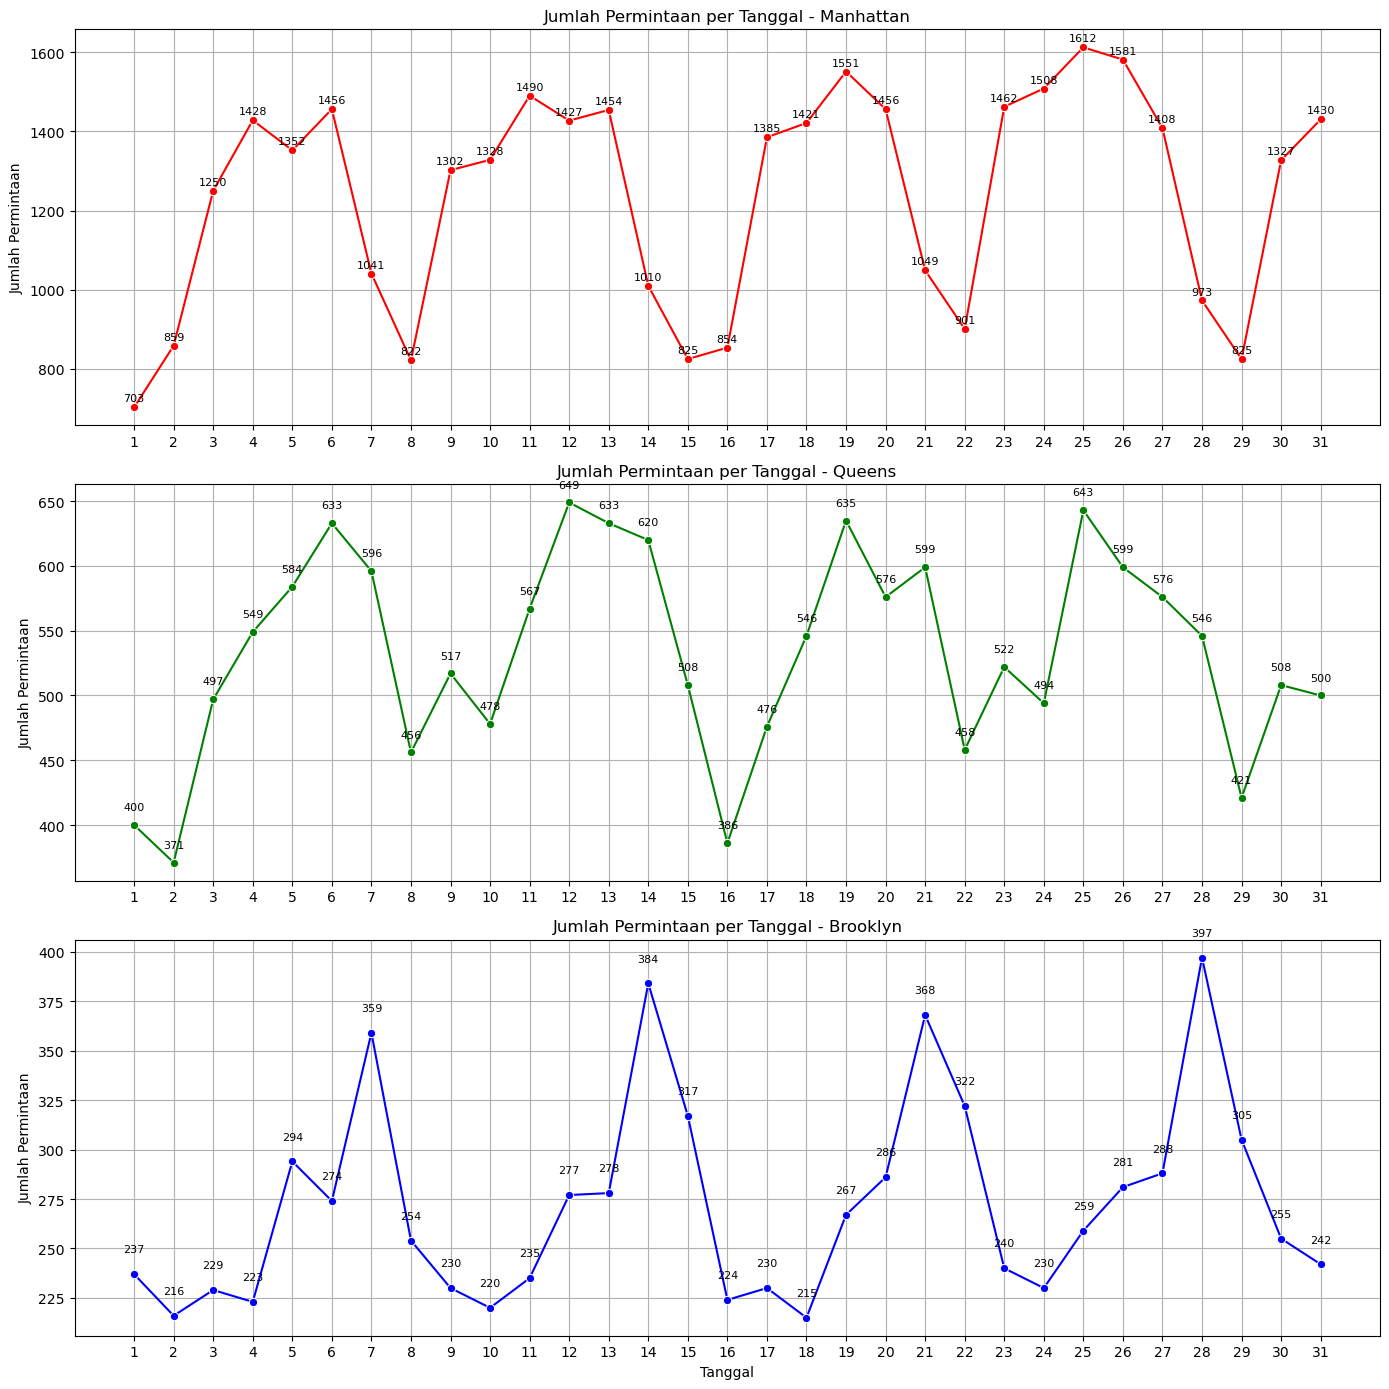

In [156]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, borough in zip(axes, selected_borough):
    subset = pu_date_count2[pu_date_count2['pu_borough'] == borough]
    
    sns.lineplot(data=subset, x='pu_date', y='count', marker='o', color=palette_colors[borough], ax=ax)
    
    ax.set_title(f'Jumlah Permintaan per Tanggal - {borough}')
    ax.set_ylabel('Jumlah Permintaan')
    ax.set_xlabel('')
    ax.grid(True)
    ax.set_xticks(pu_date_count['pu_date'])

    for x, y in zip(subset['pu_date'], subset['count']):
        ax.text(x, y+10, str(y), ha='center', va='bottom', fontsize=8, color='black')

axes[-1].set_xlabel('Tanggal')
plt.tight_layout()
plt.show()

Insight
- Jika dilihat per wilayah juga menunjukkan hal yang sama
- Pola permintaan yang tinggi berulang di tanggal **6, 12, 19, 25** pada wilayah `Manhattan` dan `Queens`
- Tetapi pada wilayah `Brooklyn` memiliki pola berulang sama namun berbeda tanggal, beda 1 hari dengan wilayah lain, permintaan yang tinggi di wilayah Brooklyn yaitu pada tanggal 7, 14, 21, dan 28
- Jika dicek ke kalender, wilayah `Manhattan` dan `Queens` memiliki permintaan yang tinggi pada **tanggal selain libur atau hari kerja** berdasarkan tanggal yang tinggi permintaan
- Sedangkan wilayah `Brooklyn` berdasarkan tanggal yang tinggi permintaan, tanggal tersebut adalah **akhir pekan atau weekend**

Maka Kita fokuskan ketersediaan armada pada tanggal selain libur atau hari kerja **(weekdays)**

Untuk wilayah `Brooklyn`, kita tambahkan armada pada akhir pekan **(weekend)**, dengan mengalihkan beberapa armada **weekend** pada wilayah lain

#### **4.2.3 Jumlah permintaan berdasarkan jam**

In [157]:
pu_hour_count = df['pu_hour'].value_counts().sort_index().to_frame()
pu_hour_count.head()

,count
pu_hour,
0,1048
1,828
2,596
3,523
4,391


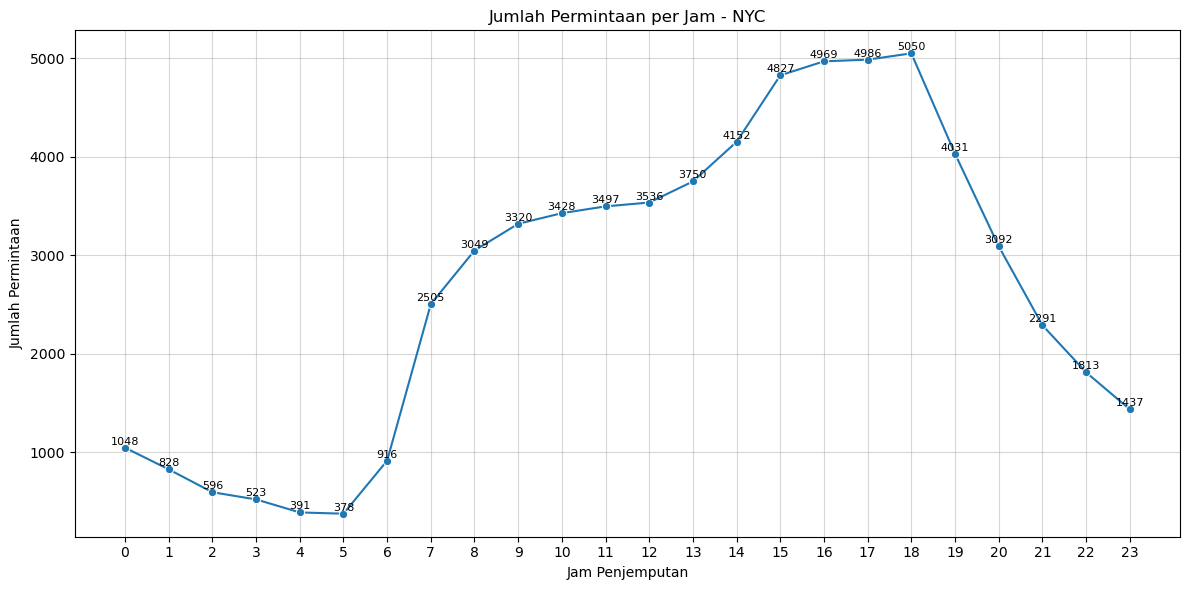

In [158]:
plt.figure(figsize=(12, 6))

ax = sns.lineplot(pu_hour_count, x='pu_hour', y='count', marker='o')
ax.set_xticks(pu_hour_count.index)

for x, y in zip(pu_hour_count.index, pu_hour_count['count']):
    ax.text(x, y+10, str(y), ha='center', va='bottom', fontsize=8, color='black')

plt.title('Jumlah Permintaan per Jam - NYC')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Jumlah Permintaan')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Insight

- Jumlah permintaan yang tertinggi yaitu pada pukul **15pm - 18pm**, dimana jam jam tersebut adalah waktu kebanyakan orang berpulang kerja
- Jumlah permintaan yang mulai tinggi pada pukul **7am - 9am**, dimana jam tersebut adalah waktu kebanyakan orang berangkat bekerja
- Penurunan permintaan terjadi setelah pukul **18pm - 5am**, dimana kebanyakan orang sudah tidak mobilitas di kota

Maka kita fokuskan armada pada jam jam sibuk Pagi **7am - 9am** dan Sore **15pm - 18pm**

In [159]:
palette_colors2 = {'Weekdays':'tab:blue','Weekend': 'tab:red'}

In [160]:
pu_hour_count2 = df[df['pu_borough'].isin(selected_borough)].groupby(['pu_borough', 'day_category', 'pu_hour']).size().reset_index(name='count')
pu_hour_count2.head()

,pu_borough,day_category,pu_hour,count
0,Brooklyn,Weekdays,0,77
1,Brooklyn,Weekdays,1,66
2,Brooklyn,Weekdays,2,29
3,Brooklyn,Weekdays,3,12
4,Brooklyn,Weekdays,4,11


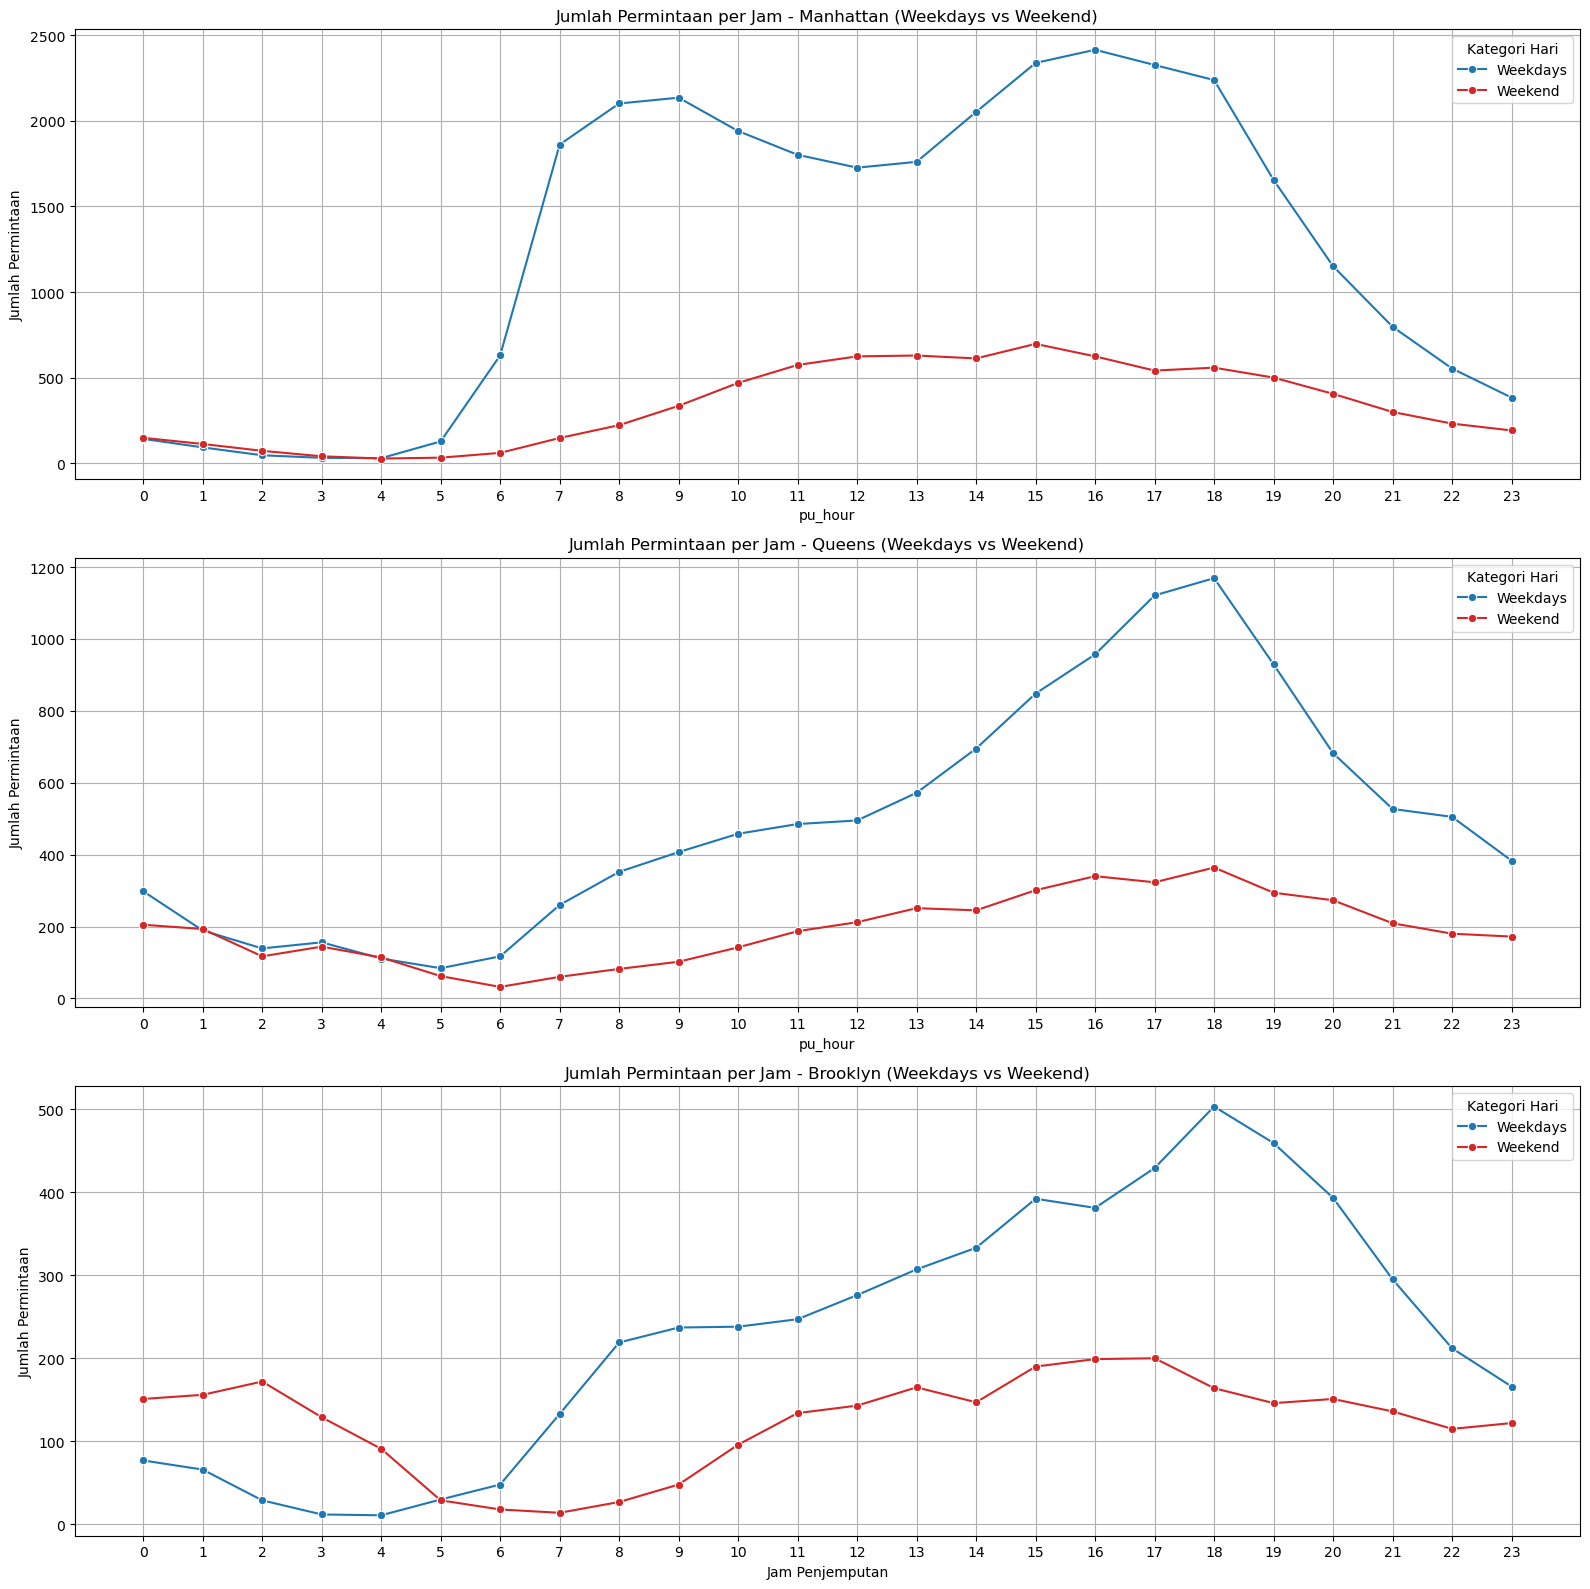

In [161]:
fig, axes = plt.subplots(3, 1, figsize=(16, 16))

for ax, borough in zip(axes, selected_borough):
    subset = pu_hour_count2[pu_hour_count2['pu_borough'] == borough]
    
    sns.lineplot(data=subset, x='pu_hour', y='count', marker='o', palette=palette_colors2, ax=ax,
                 hue='day_category', hue_order=['Weekdays', 'Weekend'])
    
    ax.set_title(f'Jumlah Permintaan per Jam - {borough} (Weekdays vs Weekend)')
    ax.set_ylabel('Jumlah Permintaan')
    ax.set_xticks(range(0, 24))
    ax.grid(True)
    ax.legend(title='Kategori Hari')

axes[-1].set_xlabel('Jam Penjemputan')
plt.tight_layout()
plt.show()

Insight
- Untuk setiap wilayah pun memiliki pola yang sama secara keseluruhan dimana permintaan tertinggi berada pada pukul **15pm - 18pm**
- Hanya ada perbedaan jumlah permintaan, dimana wilayah `Manhattan` memiliki jumlah permintaan yang lebih tinggi dibanding wilayah lainnya
- Juga hari hari **weekdays** lebih ramai permintaan dibanding **weekend**

---------------------------------------------

### **4.3 Goals 3 : Bagaimana Preferensi/Perilaku Pelanggan Green Taxi ?**

#### **4.3.1 Jenis pembayaran apa yang sering digunakan pelanggan ?**

In [162]:
payment_type_count = df.groupby('payment_type').size().reset_index(name='count').sort_values('count',ascending=False)
payment_type_count

,payment_type,count
1,Credit Card,38288
0,Cash,21726
4,Unknown,4130
3,No Charge,221
2,Dispute,48


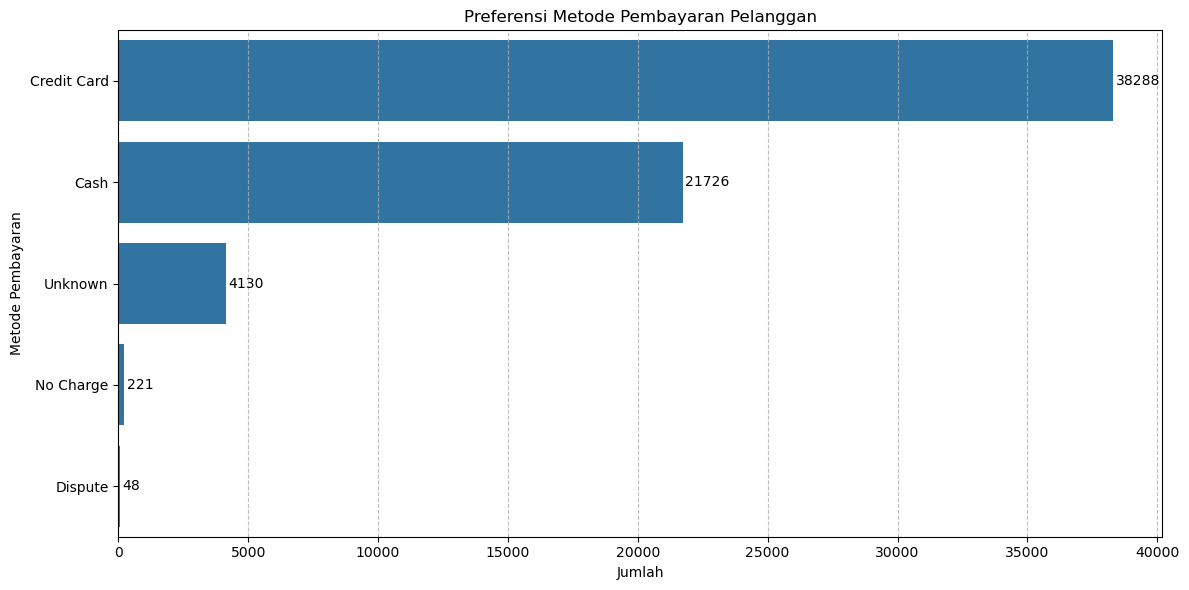

In [163]:
plt.figure(figsize=(12,6))

ax = sns.barplot(payment_type_count, y='payment_type', x='count')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2)

plt.title('Preferensi Metode Pembayaran Pelanggan')
plt.xlabel('Jumlah')
plt.ylabel('Metode Pembayaran')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Insight :

- Pelanggan lebih sering membayar dengan kartu kredit
- Beberapa pelanggan juga masih membayar menggunakan uang tunai

Maka kita perlu memastikan sistem pembayaran elektronik selalu tersedia, cepat atau bisa juga mengitegrasikan e-wallet lain

Karena pembayaran cashless lebih efisien dan aman bagi driver, minim kesalahan serta lebih aman karena driver tidak perlu membawa cash terlalu banyak agar meminimalisir perampokan

#### **4.3.2 Berapa range jarak yang sering ditempuh ?**

In [164]:
df['trip_distance'].max(), df['trip_distance'].min()

(57.09, 0.01)

In [165]:
def range_distance(x):
    if x <= 5:
        return '<5 miles'
    elif x <= 10:
        return '5-10 miles'
    elif x <= 20:
        return '10-20 miles'
    elif x <= 30:
        return '20-30 miles'
    else:
        return '>30 miles'

In [166]:
df['range_distance'] = df['trip_distance'].apply(range_distance)

In [167]:
range_distance_count = df['range_distance'].value_counts().reset_index(name='count').sort_values('count',ascending=False)
range_distance_count

,range_distance,count
0,<5 miles,55781
1,5-10 miles,6962
2,10-20 miles,1547
3,20-30 miles,99
4,>30 miles,24


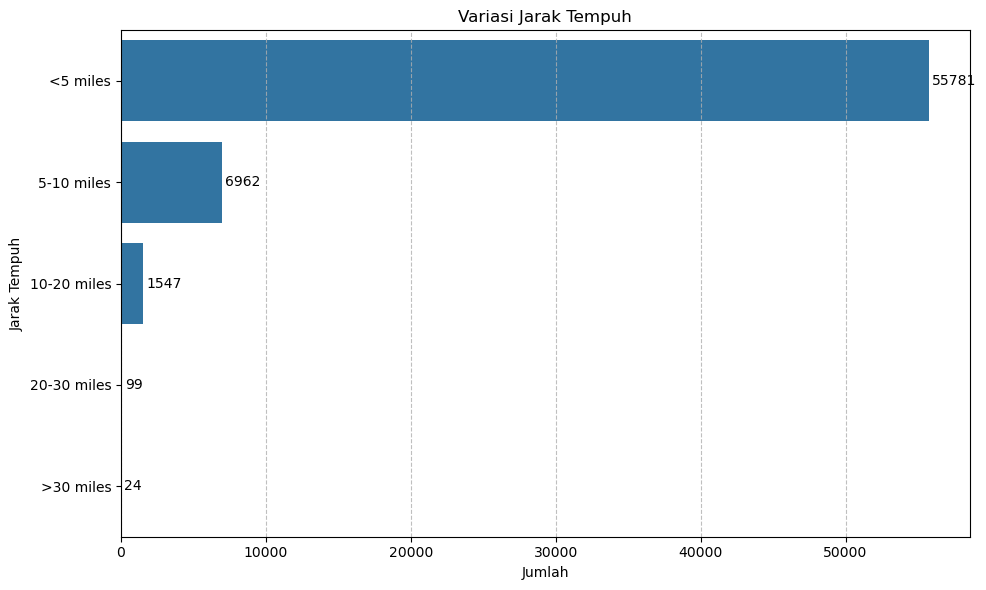

In [168]:
plt.figure(figsize=(10,6))

ax = sns.barplot(range_distance_count, y='range_distance', x='count')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2)

plt.title('Variasi Jarak Tempuh')
plt.xlabel('Jumlah')
plt.ylabel('Jarak Tempuh')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [169]:
borough_distance_count = df.groupby(['pu_borough','range_distance']).size().reset_index(name='count').sort_values('count',ascending=False)
borough_distance_count.head()

,pu_borough,range_distance,count
12,Manhattan,<5 miles,34471
22,Queens,<5 miles,13986
7,Brooklyn,<5 miles,6608
11,Manhattan,5-10 miles,3443
21,Queens,5-10 miles,1980


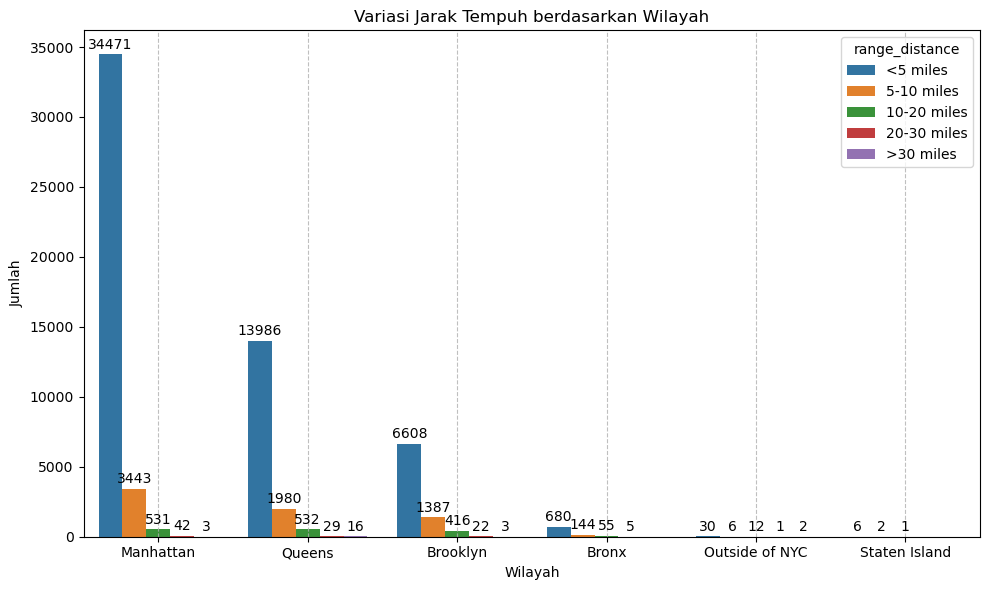

In [170]:
plt.figure(figsize=(10,6))

ax = sns.barplot(borough_distance_count, hue='range_distance', y='count', x='pu_borough')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=2)

plt.title('Variasi Jarak Tempuh berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

Insight :

- Pelanggan lebih banyak menggunakan taksi untuk mobilitas <5 miles

Kita bisa mengupayakan tarif flat untuk jarak tertentu dibawah 5 mil, misal tarif flat untuk menarik pelanggan, dengan pertimbangan yang matang pula dengan tim bisnis

#### **4.3.3 Bagaimana hubungan antara jumlah tip yang diberikan pelanggan ?**

<Axes: >

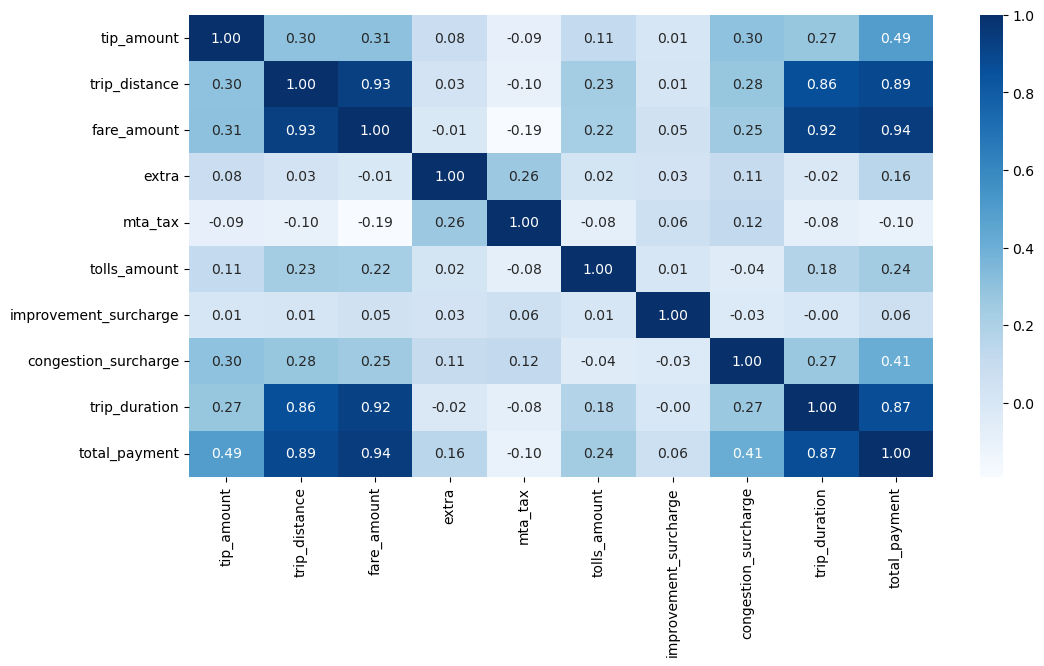

In [171]:
corr_cols = ['tip_amount','trip_distance','fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','congestion_surcharge','trip_duration','total_payment']
corr_matrix = df[corr_cols].corr(method='spearman')

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues')

In [172]:
from scipy.stats import spearmanr

stats, pvalue = spearmanr(df['tip_amount'], df['total_payment'])

print('Korelasi Spearman =', round(stats, 3))
print('Pvalue = ', pvalue)
if pvalue < 0.05:
    print('H0 diterima: Ada hubungan antara tip_amount dan total_payment')
else:
    print('Ha diterima: Tidak ada hubungan antara tip_amount dan total_payment')

Korelasi Spearman = 0.495
Pvalue =  0.0
H0 diterima: Ada hubungan antara tip_amount dan total_payment


In [173]:
stats, pvalue = spearmanr(df['tip_amount'], df['congestion_surcharge'])

print('Korelasi Spearman =', round(stats, 3))
print('Pvalue = ', pvalue)
if pvalue < 0.05:
    print('H0 diterima: Ada hubungan antara tip_amount dan congestion_surcharge')
else:
    print('Ha diterima: Tidak ada hubungan antara tip_amount dan congestion_surcharge')

Korelasi Spearman = 0.301
Pvalue =  0.0
H0 diterima: Ada hubungan antara tip_amount dan congestion_surcharge


Insight :

Korelasi tertinggi dari `tip_amount` yaitu dengan `total_payment` dimana semakin besar `total_payment` biasanya tip yang diberikan cenderung lebih besar namun tingkat korelasinya tergolong **sedang**
- `total_payment` yang besar memiliki hubungan **sangat kuat** dengan `trip_distance` `fare_amount` dan `trip_duration` kalau kita lihat nilai korelasinya yang tergolong tinggi

Korelasi rendah antara `tip_amount` dan `congestion_surcharge`, yang mungkin karena penumpang merasa kasihan kepada driver akibat kemacetan, namun hal tersebut korelasinya **lemah**

Jumlah tip yang diberikan oleh pelanggan bisa menjadi indikasi bahwa pelanggan merasa puas dengan layanan yang diberikan
- Namun dalam data yang ada hanya bisa menjelaskan tip besar yang diberikan pelanggan karena `total_payment` yang besar, `trip_distance` `congestion_surcharge` `trip_duration`

Hal ini menunjukkan bahwa ada faktor faktor lain yang mempengaruhi jumlah tip yang diberikan seperti kenyamanan, keramahan driver, kondisi kendaraan yang menjadi pengaruh juga untuk besaran tip

#### **4.3.4 Bagaimana jumlah tip yang diberikan pelanggan berdasarkan wilayah ?**

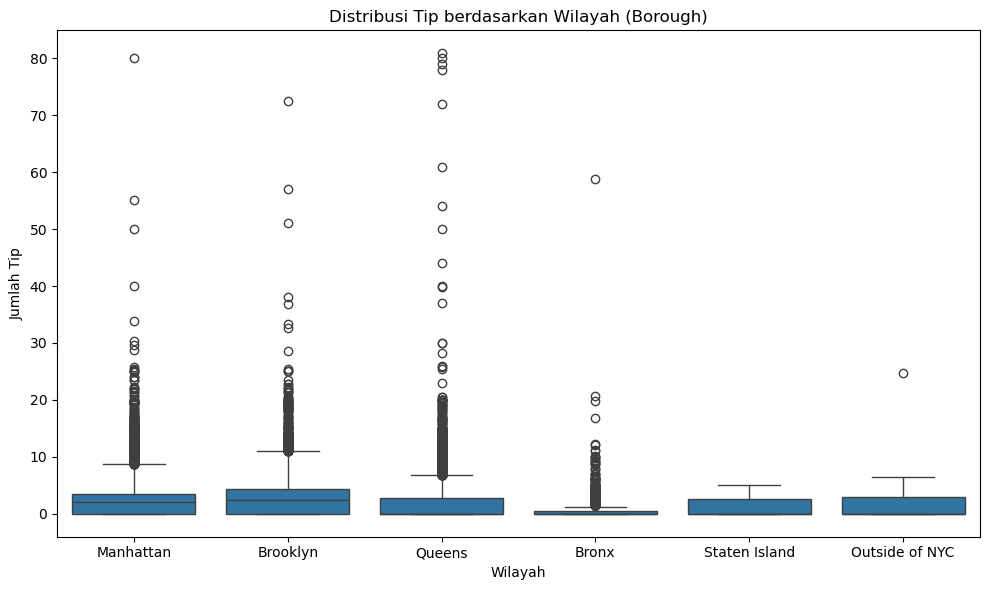

In [174]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='pu_borough', y='tip_amount')

plt.title('Distribusi Tip berdasarkan Wilayah (Borough)')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Tip')
plt.tight_layout()
plt.show()

In [175]:
df[df['tip_amount'] > 20].shape[0]

79

In [176]:
79/len(df) * 100

0.12264604971046217

- Karena jumlah data dengan tip > 20 hanya 79 (0.12%) maka saya hapus agar outlier tidak terlalu jauh

In [177]:
df.drop(df[df['tip_amount'] > 20].index, inplace=True)

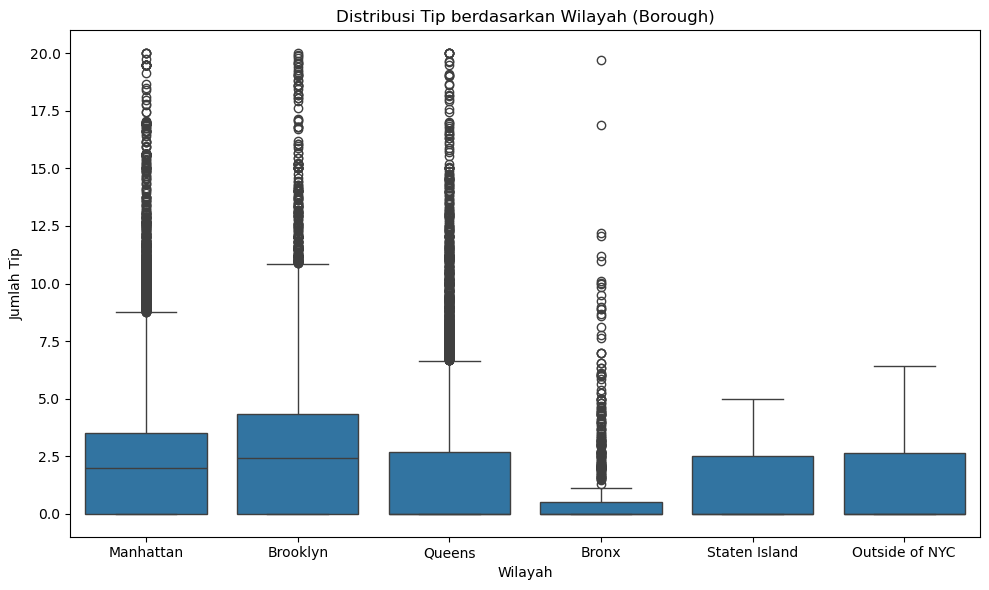

In [178]:
# Setelah membuang outlier

plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='pu_borough', y='tip_amount')

plt.title('Distribusi Tip berdasarkan Wilayah (Borough)')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Tip')
plt.tight_layout()
plt.show()

In [179]:
from scipy.stats import kruskal

list_tip = []
for borough in df['pu_borough'].unique():
    tip = df[df['pu_borough'] == borough]['tip_amount'].dropna()
    list_tip.append(tip)

stats, pvalue = kruskal(*list_tip)

print('Stats =', stats)
print('Pvalue =', pvalue)
if pvalue < 0.05:
    print('H0 diterima: Ada perbedaan signifikan tip antar borough')
else:
    print('Ha diterima: Tidak ada perbedaan signifikan tip antar borough')

Stats = 2617.8897182338196
Pvalue = 0.0
H0 diterima: Ada perbedaan signifikan tip antar borough


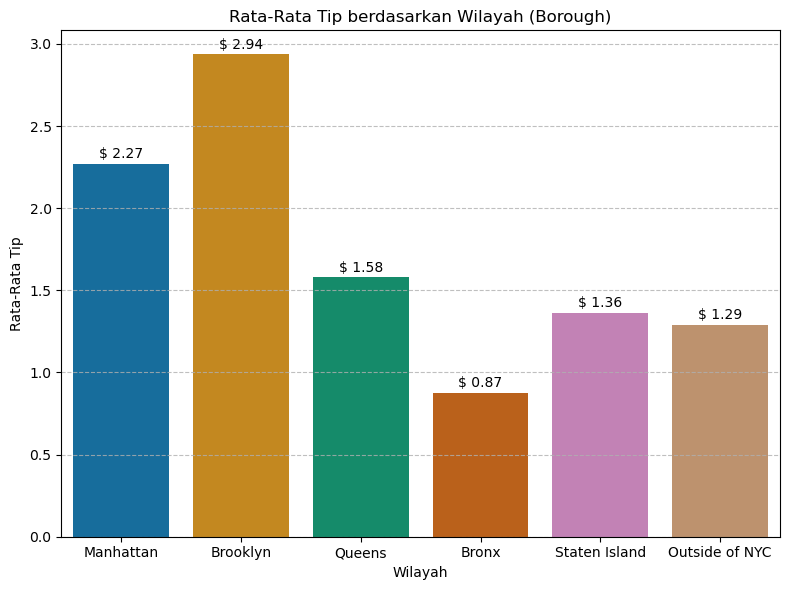

In [180]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=df, x='pu_borough', y='tip_amount', estimator='mean', ci=None, palette='colorblind')

for container in ax.containers:
    ax.bar_label(container, fmt='$ %.2f',label_type='edge',padding=2)

plt.title('Rata-Rata Tip berdasarkan Wilayah (Borough)')
plt.xlabel('Wilayah')
plt.ylabel('Rata-Rata Tip')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [181]:
from scipy.stats import mannwhitneyu

stats, pvalue = mannwhitneyu(df.query('pu_borough == "Brooklyn"')['tip_amount'], 
                             df.query('pu_borough == "Manhattan"')['tip_amount'],
                             alternative='greater')

print('Stats =', stats)
print('Pvalue =', pvalue)
if pvalue < 0.05:
    print('H0 diterima: Tip wilayah Brooklyn lebih besar dari Manhattan')
else:
    print('Ha diterima: Tip wilayah Brooklyn tidak terbukti lebih besar')

Stats = 179647228.0
Pvalue = 6.721371815574203e-60
H0 diterima: Tip wilayah Brooklyn lebih besar dari Manhattan


Insight :

- `Brooklyn` adalah wilayah dengan rata rata tip tertinggi yaitu $2.94 dan diikuti oleh `Manhattan` $2.27
- Kedua wilayah tersebut memiliki rata rata tip $2

Optimalkan pelayanan di semua wilayah terutama `Brooklyn` dan `Manhattan`, meski rata rata tip `Manhattan` lebih kecil dari `Brooklyn` namun secara volume permintaan `Manhattan` lebih tinggi

## **Kesimpulan dan Rekomendasi**

**Kesimpulan**

Dari analisis yang sudah dilakukan, kita dapat menarik kesimpulan bahwa :

1. WIlayah dengan permintaan tertinggi adalah Manhattan, diikuti oleh wilayah Queens dan Brooklyn

2. Zona dengan permintaan tertinggi berada pada wilayah Manhattan

3. Hari hari kerja (weekdays) lebih ramai permintaan dibanding akhir pekan (weekend). Kecuali pada wilayah Brooklyn yang lebih ramai di akhir pekan (weekend)

4. Pada tanggal merah (hari libur) permintaan cenderung turun karena mobilitas masyarakat yang tidak tinggi

5. Jam jam sibuk mendominasi permintaan yaitu pada Pagi hari (7:00 - 9:00), Siang hari (10:00 - 14:00) dan Sore hari (15:00 - 18:00)

6. Pelanggan lebih banyak melakukan pembayaran menggunakan kartu kredit

7. Banyak pelanggan yang menggunakan taksi untuk berpergian dengan jarak <5 mil

8. Tip memiliki korelasi positif dengan total biaya perjalanan, meskipun tingkat korelasinya sedang

9. Adanya faktor lain diluar biaya perjalanan yang mempengaruhi besaran tip

10. Setiap wilayah memiliki besaran tip yang berbeda

**Rekomendasi**

1. Mengoptimalisasi armada di Manhattan terutama pada jam sibuk, alihkan zona rendah ke zona tinggi permintaan

2. Memfokuskan armada pada akhir pekan (weekend) di wilayah Brooklyn, dengan mengalihkan beberapa armada pada zona sepi di wilayah lain ke Brooklyn

3. Mengurangi jumlah armada yang aktif di hari libur untuk efisiensi operasional

4. Menyediakan armada lebih responsif pada jam sibuk agar supply selalu tersedia

5. Karena kartu kredit lebih dominan, bisa menjalin kerja sama dengan penyedia kartu kredit untuk promo cashback atau poin untuk menarik pelanggan

6. Bisa menerapkan tarif flat untuk perjalanan dengan jarak <5 mil agar pelanggan lebih merasa hemat dan loyal

7. Perkuat layanan di area Central Bussiness District yaitu Manhattan, karena demand jarak dekat yang tinggi

8. Membuat survey kepuasan pelanggan untuk evaluasi

9. Meningkatkan keramahan driver, menjaga kebersihan kendaraan untuk meningkatkan kenyamanan dan kepuasan pelanggan

10. Mengoptimalkan pelayanan disetiap wilayah, contoh seperti Manhattan jangan terfokus dengan tip, tetapi manfaatkan volume tinggi pada wilayah tesebut